In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

ENV = "CartPole-v0"
NUM_DIZITIZED = 6
# env = gym.make(ENV)
# observation = env.reset()

In [2]:
# th for digitization

# def bins(clip_min, clip_max, num):
#     return np.linespace(clip_min, clip_max, num + 1)[1:-1]

In [3]:
# def degitize_state(observation):
#     cart_pos, cart_v, pole_angle, pole_v = observation
#     digitized = [
#         np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)),
#         np.digitize(cart_v, bins=bins(-3.0, 3.0, NUM_DIZITIZED)),
#         np.digitize(pole_angle, bins=bins(-0.5, 0.5, NUM_DIZITIZED)),
#         np.digitize(pole_v, bins=bins(-2.0, 2.0, NUM_DIZITIZED))]
#     return sum([x * (NUM_DIZITIZED**i) for i,x in enumarate(digitized)])

In [4]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython import display as Idisplay
from IPython.display import display

def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=30)
    
    anim.save('movie_cartpole.mp4')
    display(display_animation(anim))

In [5]:
GAMMA = 0.99
Eta = 0.5
MAX_STEPS = 200
NUM_EPISODES = 1000

In [6]:
class Agent:
    #  cart with pole
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)
        
    def update_Q_function(self, observation, action, reward, observation_next):
        #  Updating Q function
        self.brain.update_Q_table(observation, action, reward, observation_next)
        
    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action

In [7]:
class Brain:
    #  Brain of agent
    def __init__(self, num_states, num_actions):
        self.num_actions = num_actions
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIZITIZED**num_states, num_actions))
        
    def bins(self, clip_min, clip_max, num):
        return np.linspace(clip_min, clip_max, num + 1)[1:-1]
    
    def digitize_state(self, observation):
        cart_pos, cart_v, pole_angle, pole_v = observation
        digitized = [
            np.digitize(cart_pos, bins=self.bins(-2.4, 2.4, NUM_DIZITIZED)),
            np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIZITIZED)),
            np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIZITIZED)),
            np.digitize(pole_v, bins=self.bins(-2.0, 2.0, NUM_DIZITIZED))]
        return sum([x * (NUM_DIZITIZED**i) for i,x in enumerate(digitized)])
    
    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        Max_Q_next = max(self.q_table[state_next][:])
        self.q_table[state, action] = self.q_table[state, action] + Eta * (reward + GAMMA * Max_Q_next - self.q_table[state, action])
        
    def decide_action(self, observation, episode):
        # e-greedy
        state = self.digitize_state(observation)
        epsilon = 0.5 * (1 / (episode + 1))
        
        if epsilon <= np.random.uniform(0, 1):
            action = np.argmax(self.q_table[state][:])
        else:
            action = np.random.choice(self.num_actions) # return 0 or 1 (random)
        return action

In [8]:
class Environment:
    def __init__(self):
        self.env = gym.make(ENV) 
        num_states = self.env.observation_space.shape[0]  
        num_actions = self.env.action_space.n
        
        self.agent = Agent(num_states, num_actions)
        
    def run(self):
        complete_episodes = 0
        is_episode_final = False
        frames = []
        
        for episode in range(NUM_EPISODES):
            observation = self.env.reset()
            
            for step in range(MAX_STEPS): # an episode
                if is_episode_final is True:
                    frames.append(self.env.render(mode='rgb_array'))
                action = self.agent.get_action(observation, episode)
                observation_next, _, done, _ = self.env.step(action)
                if done:
                    if step < 195:
                        reward = -1
                        complete_episodes = 0
                    else:
                        reward = 1
                        complete_episodes += 1
                else:
                    reward = 0
                self.agent.update_Q_function(observation, action, reward, observation_next)
                observation = observation_next
                
                if done:
                    print('{0} Episode: Finished after {1} time steps'.format(episode, step + 1))
                    break
            if is_episode_final is True:
                display_frames_as_gif(frames)
                break
            if complete_episodes >= 10:
                print("success for 10 episodes!")
                is_episode_final = True

0 Episode: Finished after 23 time steps
1 Episode: Finished after 10 time steps
2 Episode: Finished after 11 time steps
3 Episode: Finished after 9 time steps
4 Episode: Finished after 13 time steps
5 Episode: Finished after 10 time steps
6 Episode: Finished after 40 time steps
7 Episode: Finished after 9 time steps
8 Episode: Finished after 10 time steps
9 Episode: Finished after 11 time steps
10 Episode: Finished after 13 time steps
11 Episode: Finished after 10 time steps
12 Episode: Finished after 9 time steps
13 Episode: Finished after 12 time steps
14 Episode: Finished after 10 time steps
15 Episode: Finished after 10 time steps
16 Episode: Finished after 16 time steps
17 Episode: Finished after 38 time steps
18 Episode: Finished after 13 time steps
19 Episode: Finished after 45 time steps
20 Episode: Finished after 54 time steps
21 Episode: Finished after 26 time steps
22 Episode: Finished after 9 time steps
23 Episode: Finished after 10 time steps
24 Episode: Finished after 55 


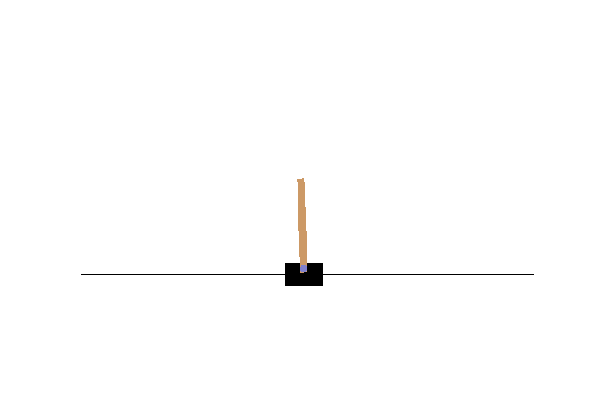
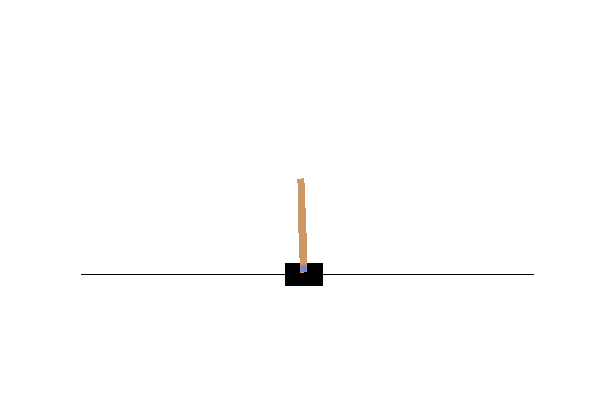
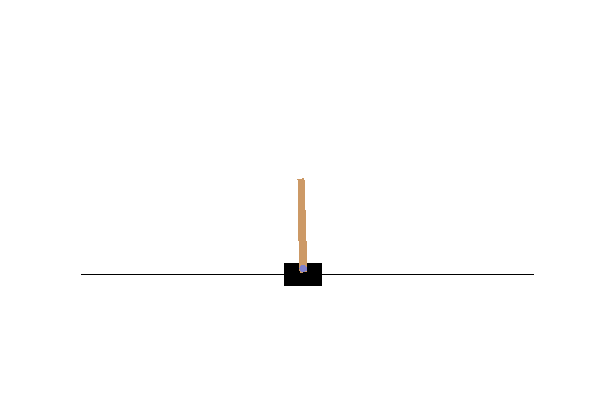
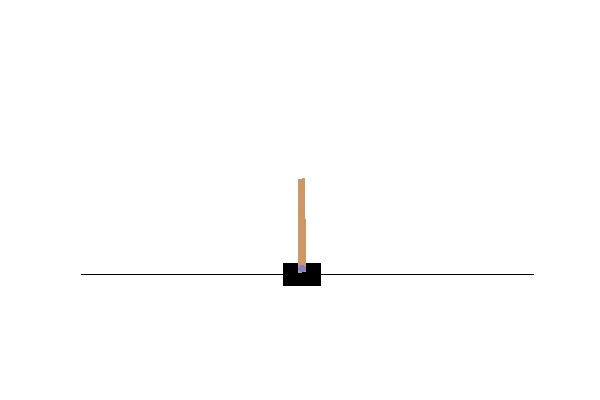
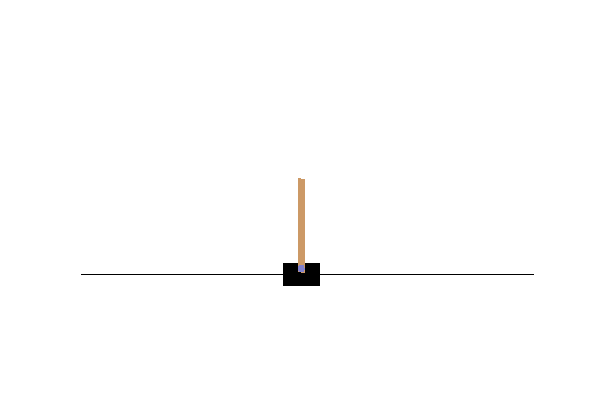
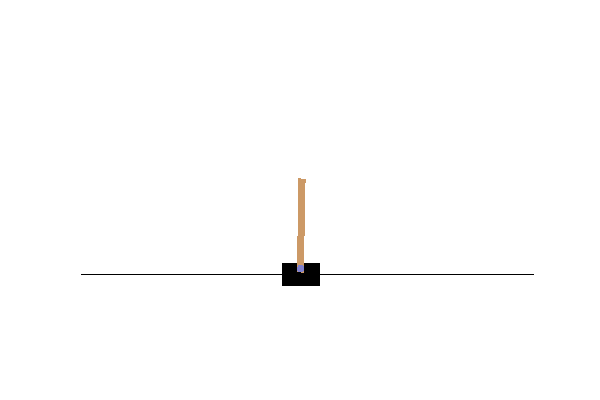
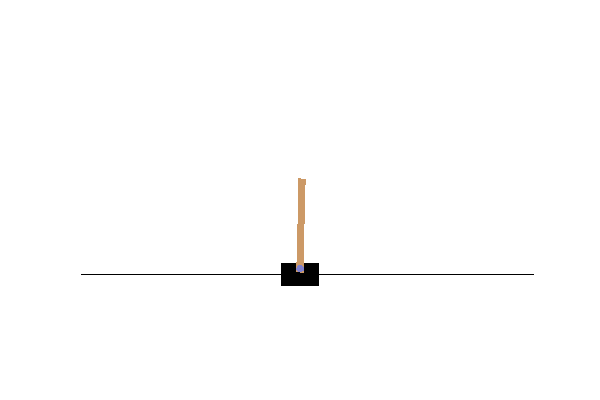
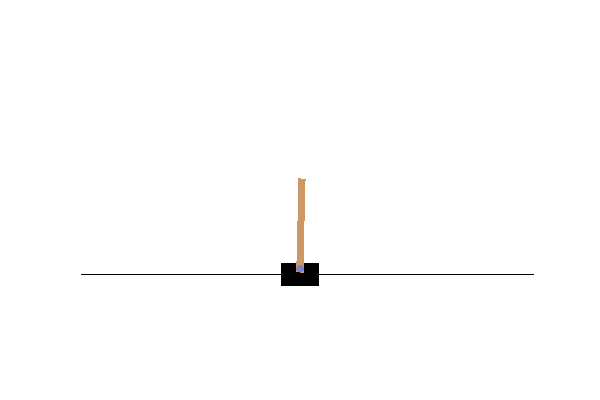
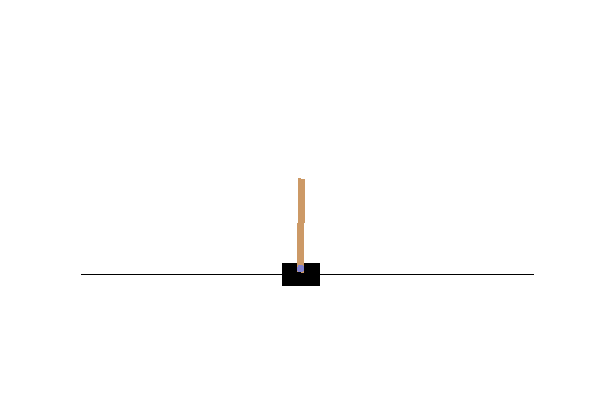
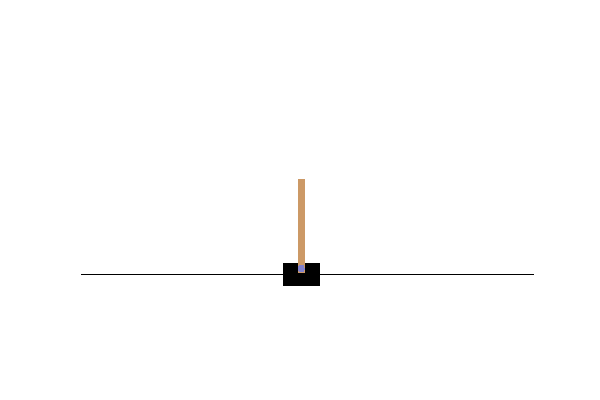
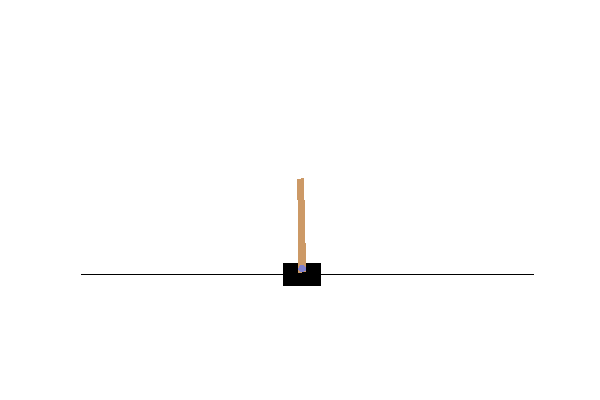
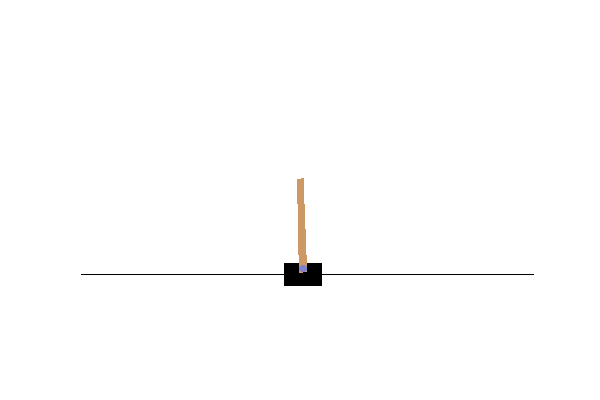
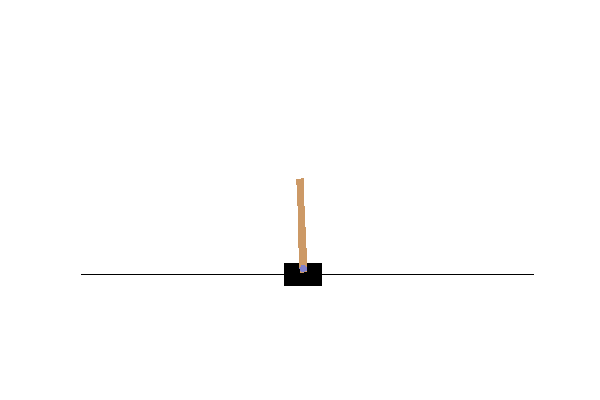
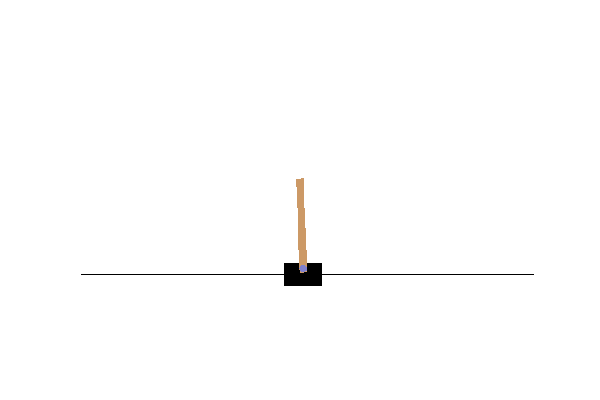
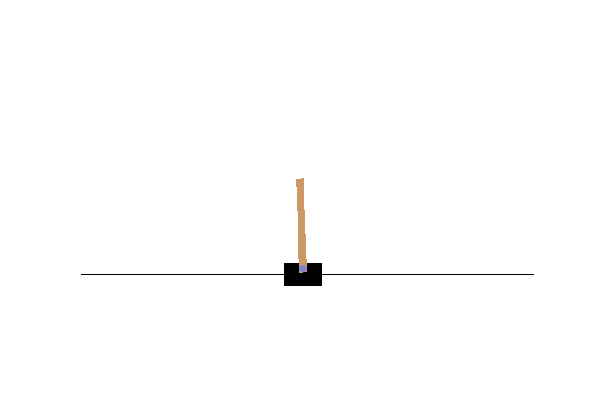
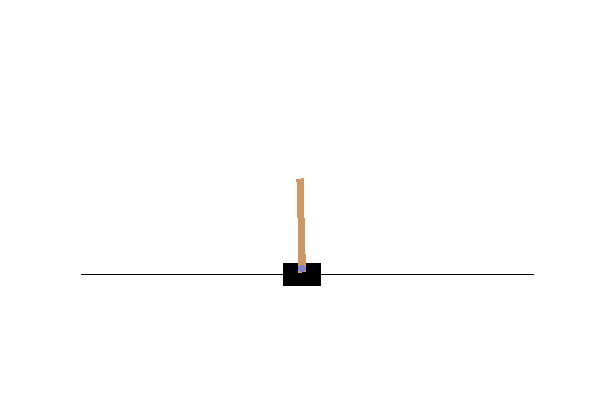
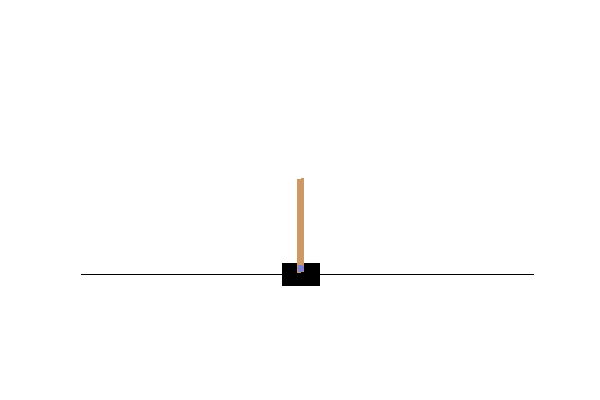
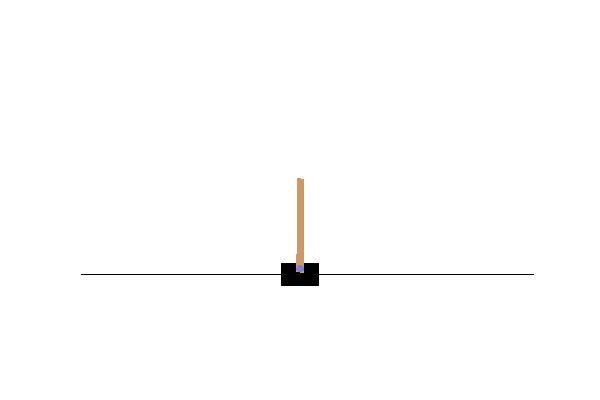
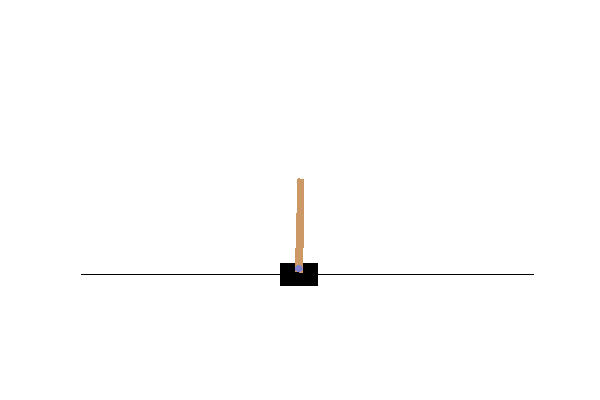
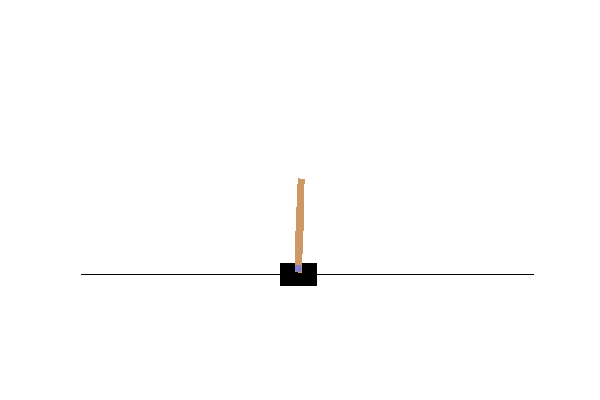
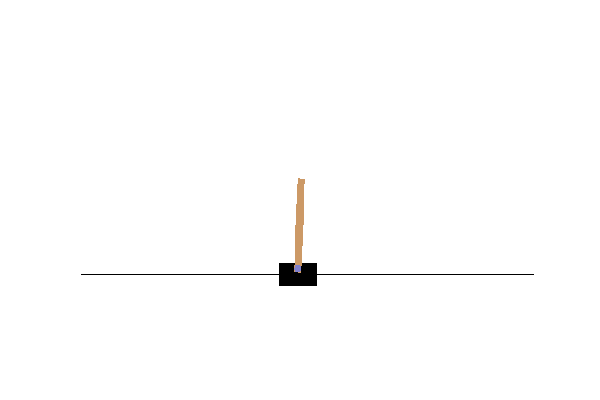
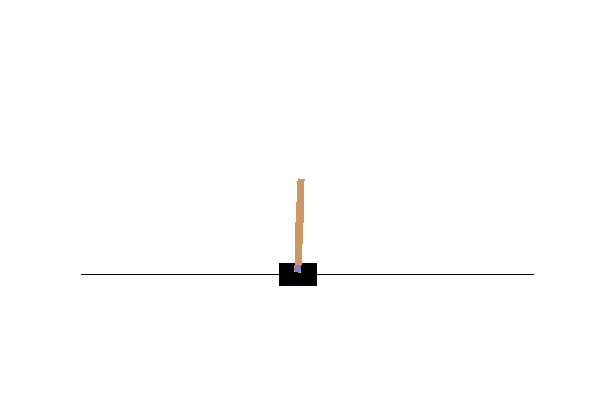
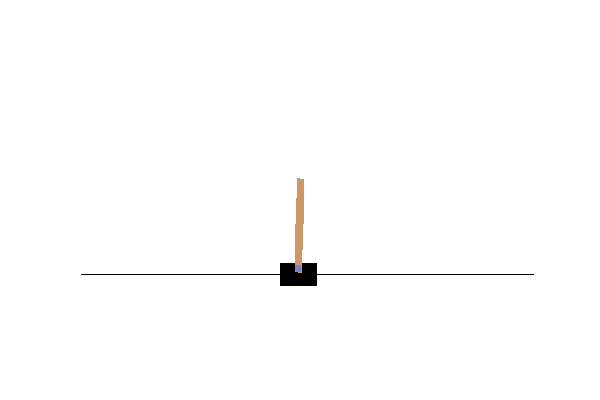
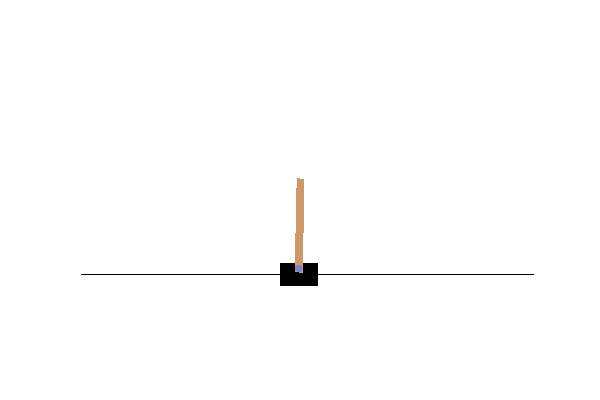
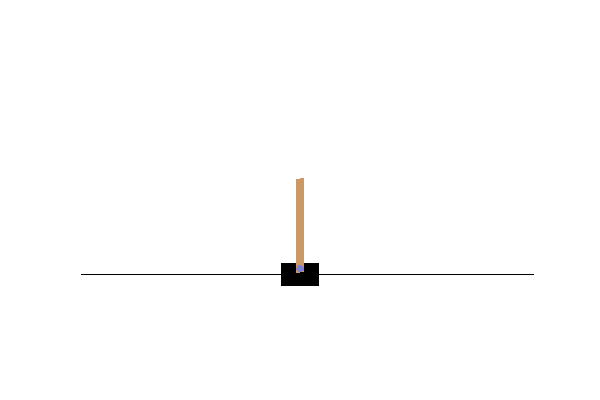
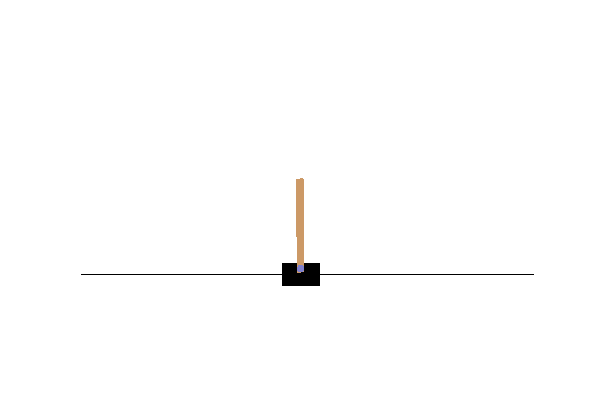
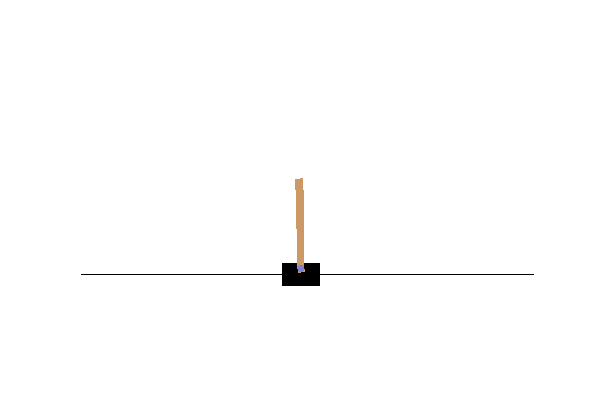
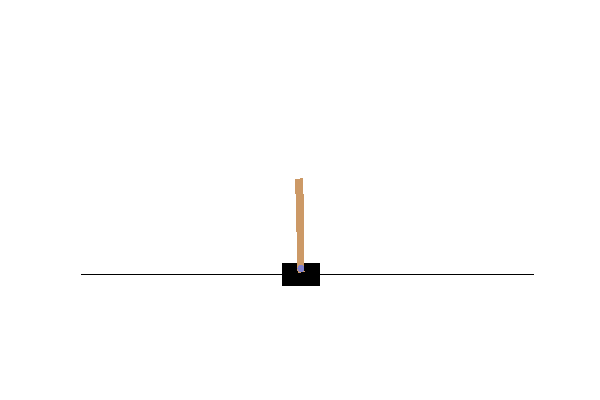
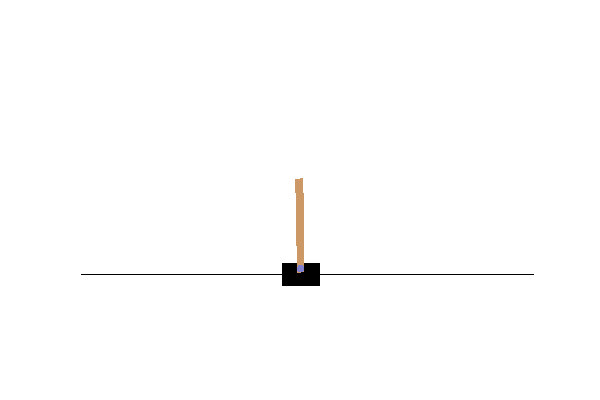
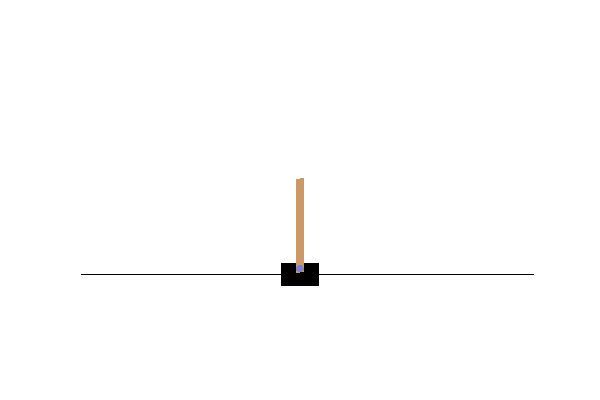
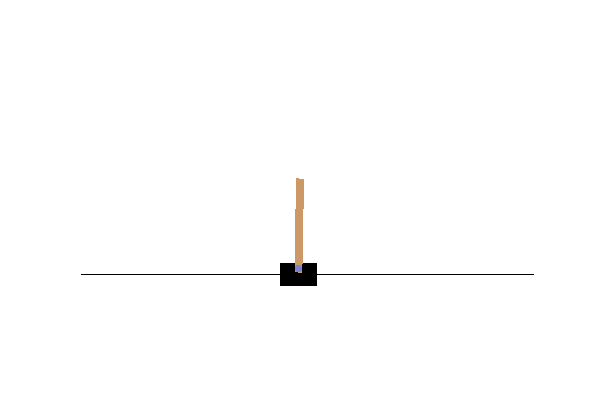
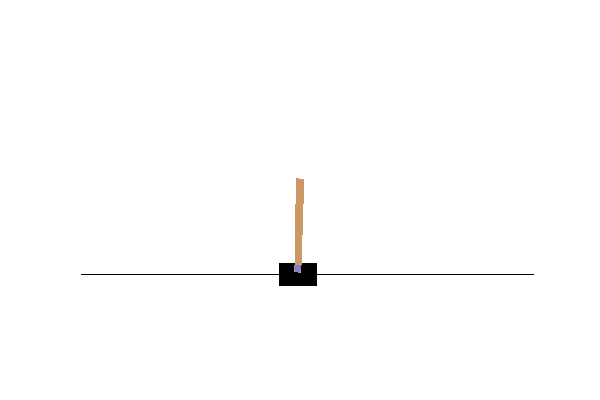
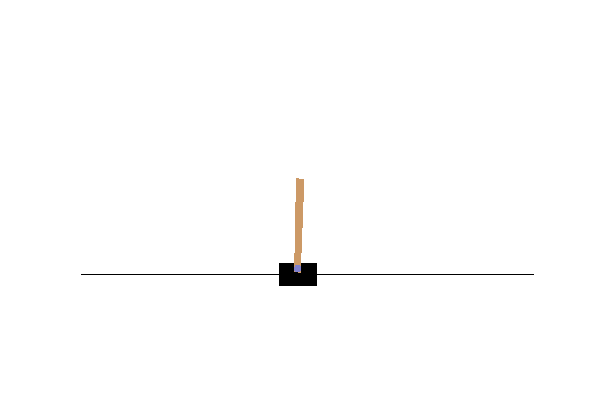
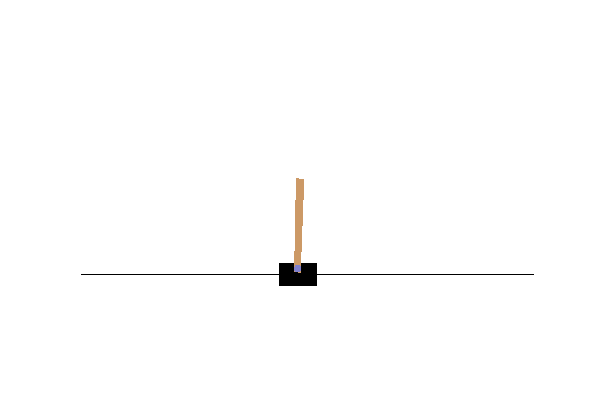
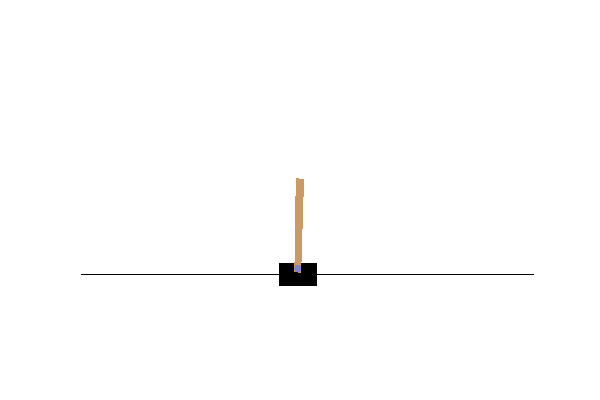
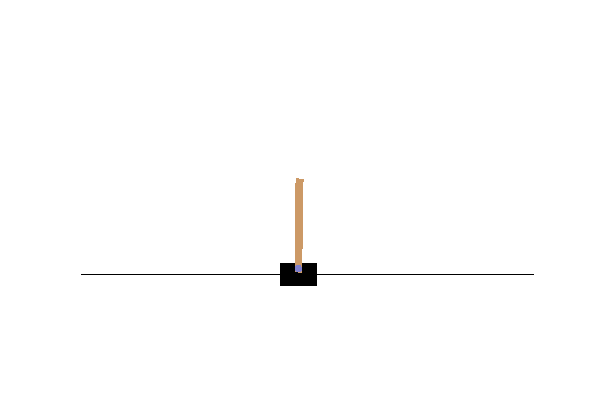
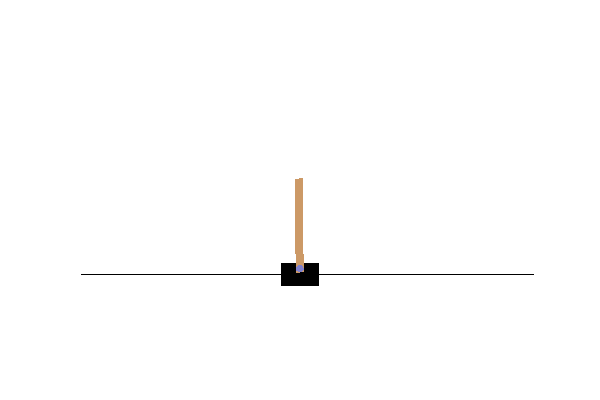
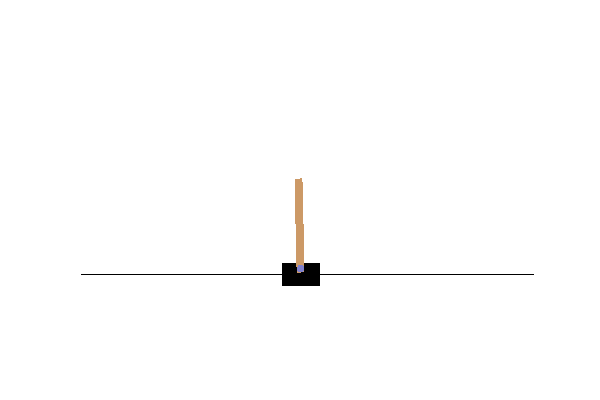
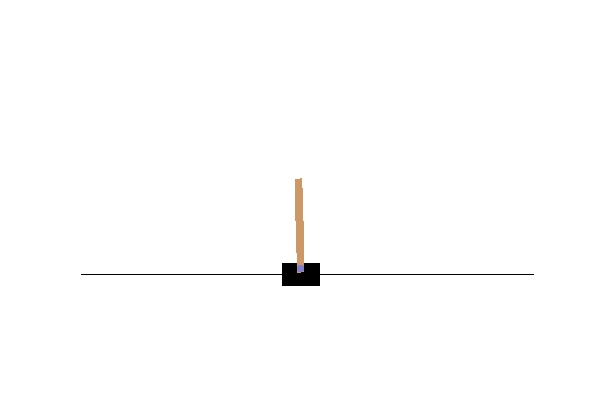
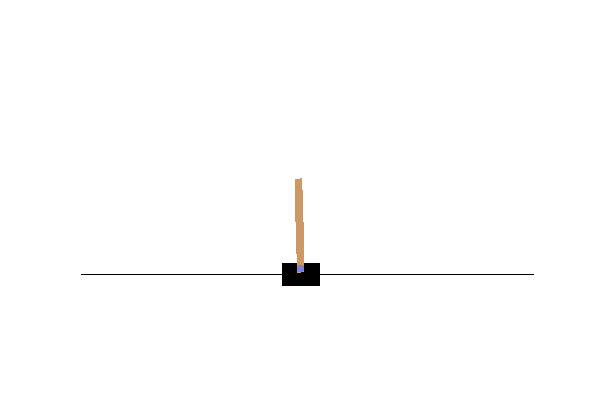
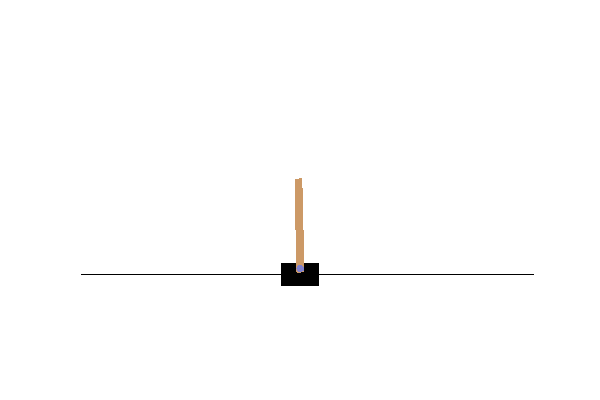
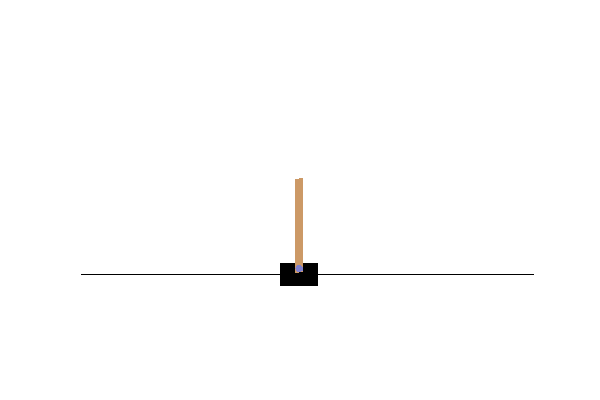
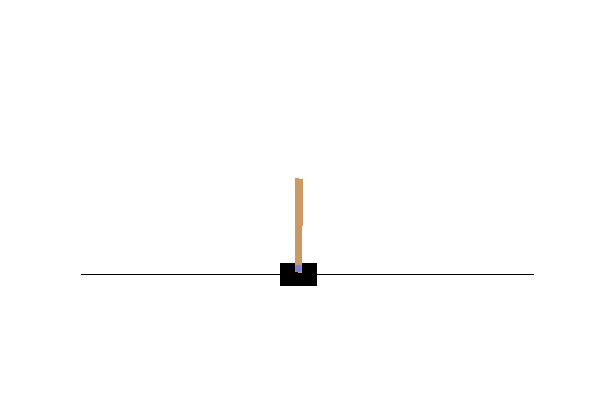
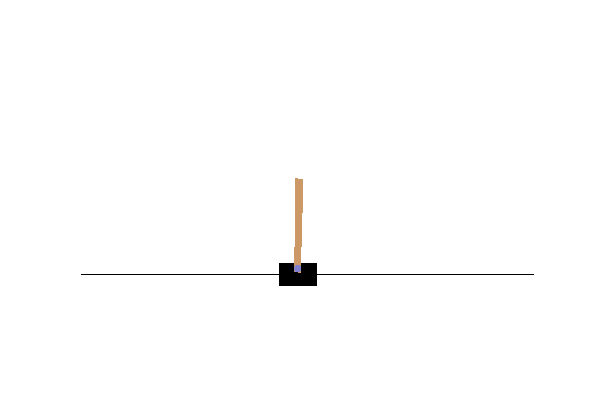
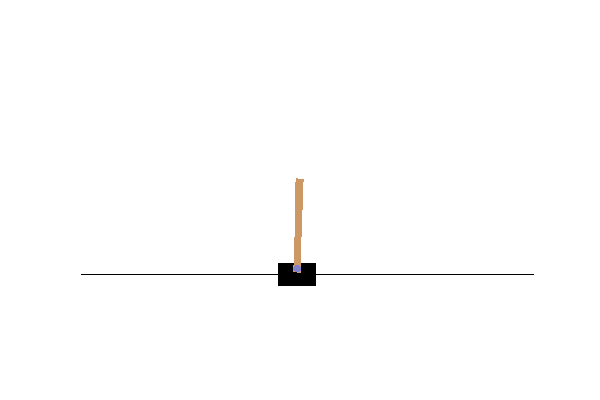
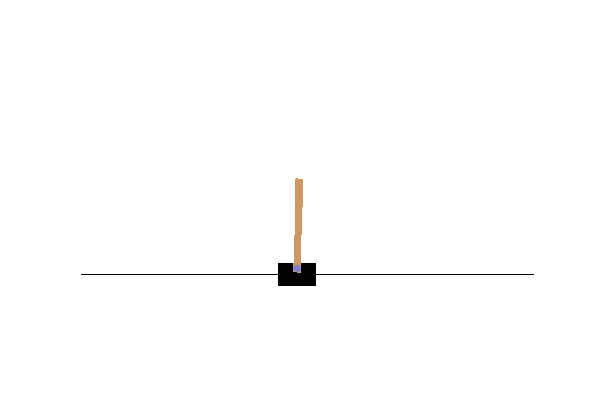
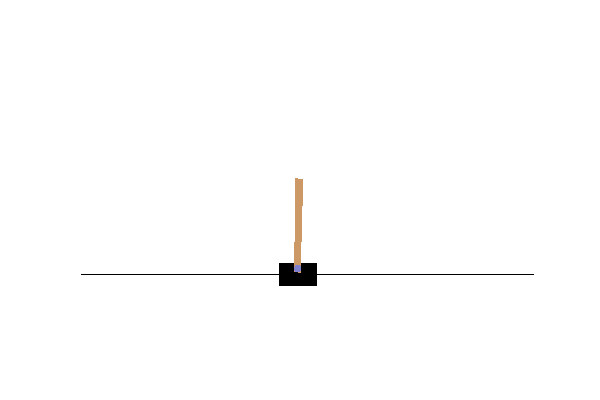
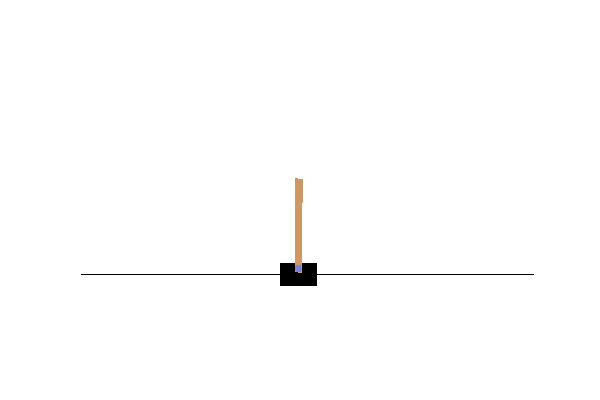
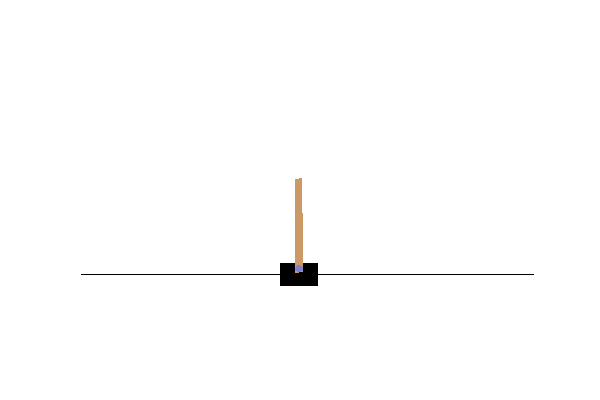
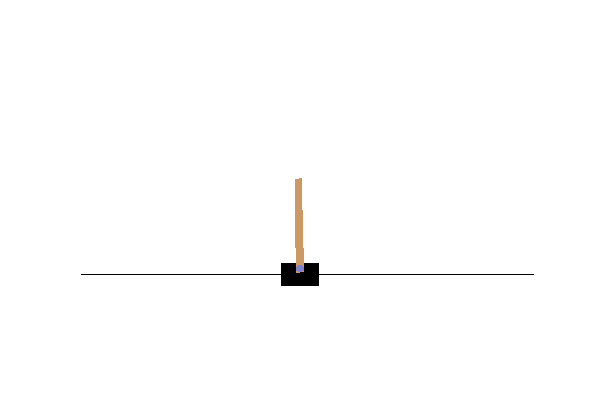
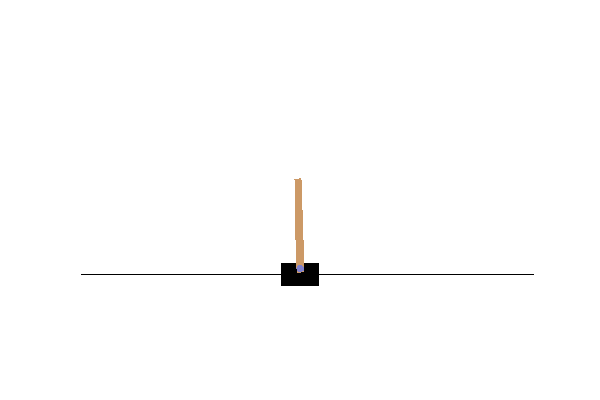
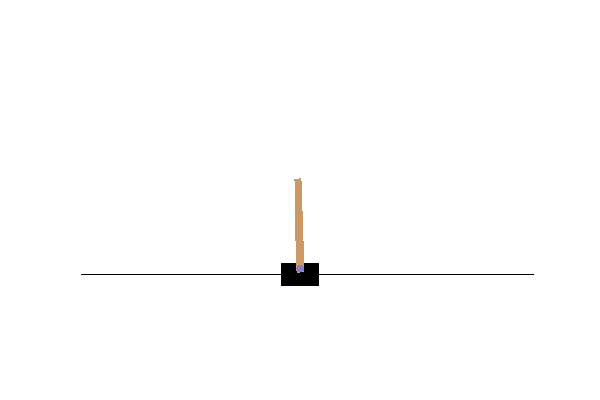
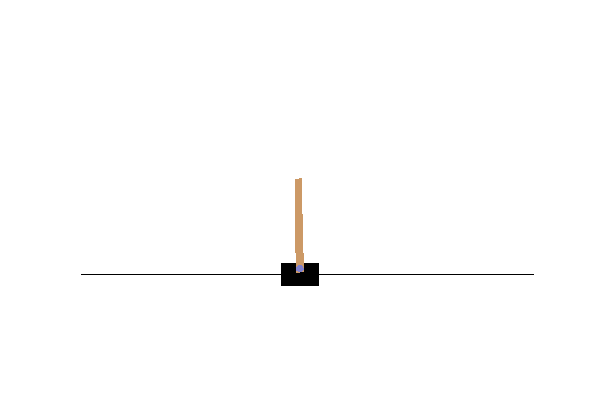
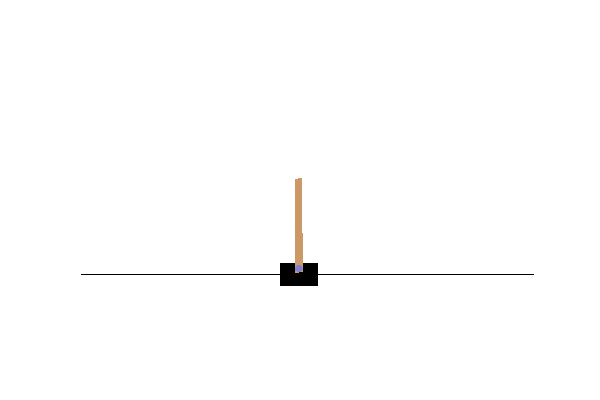
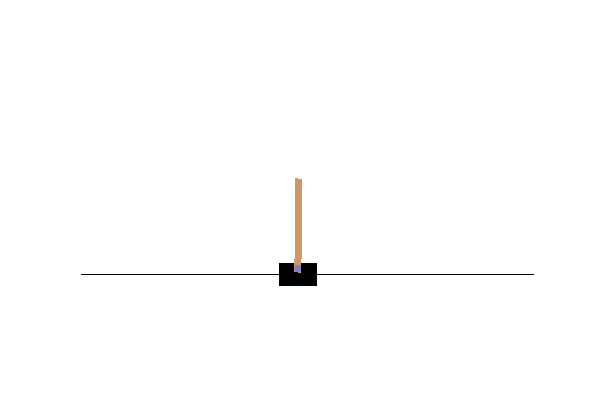
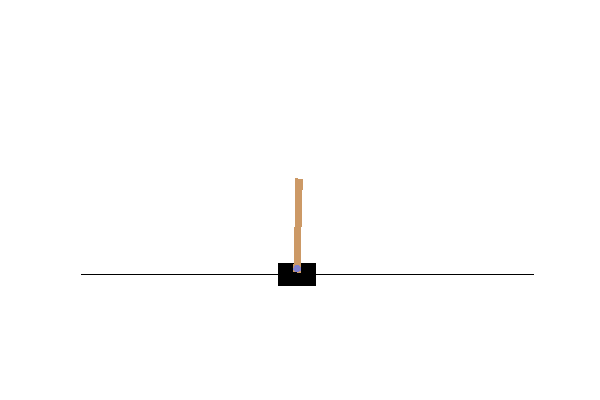
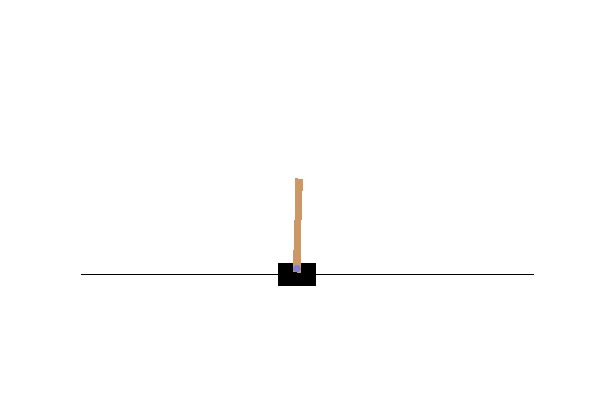
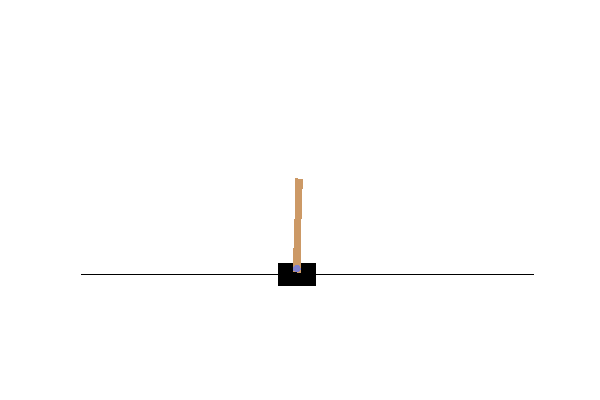
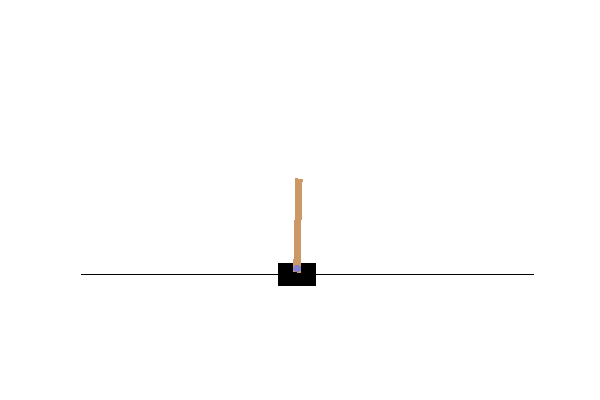
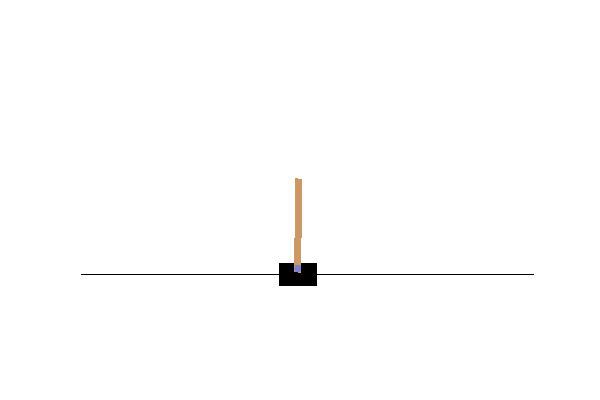
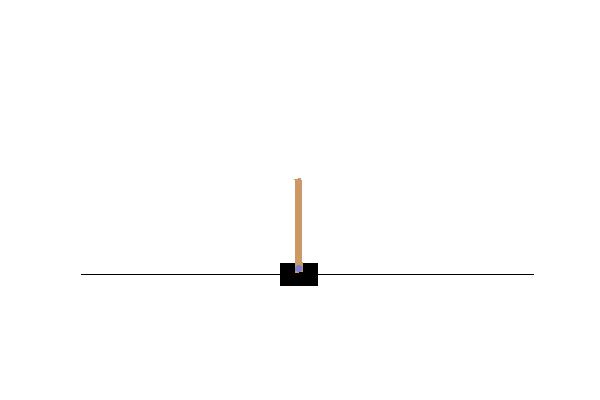
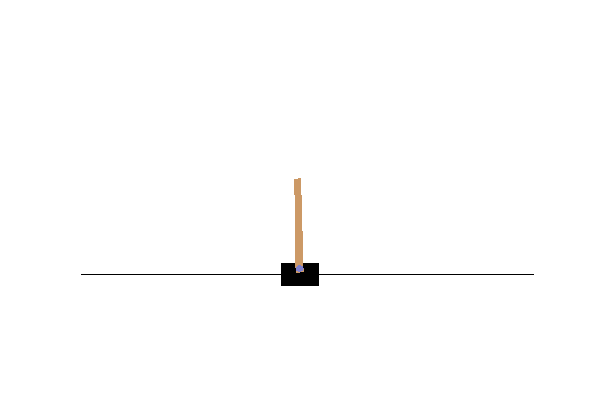
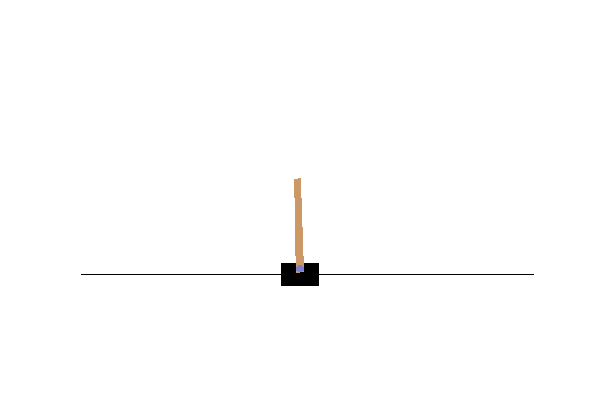
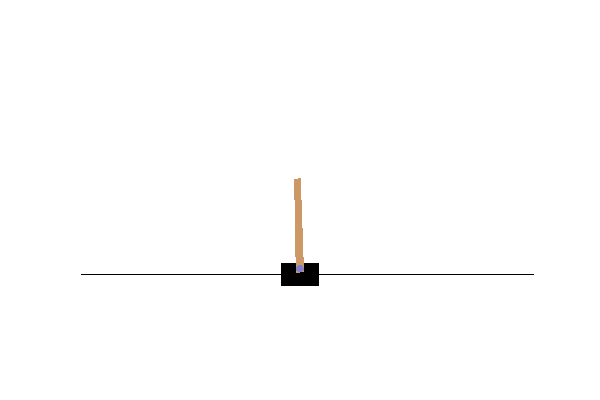
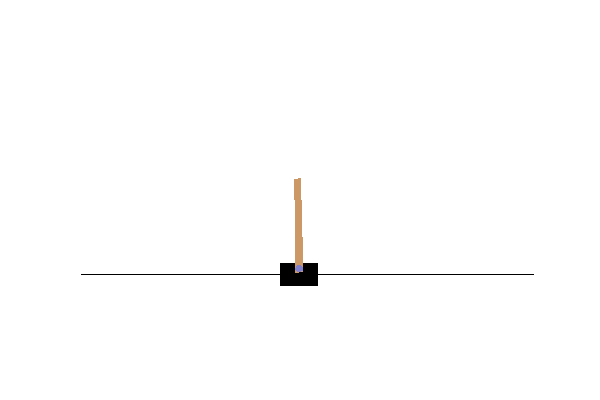
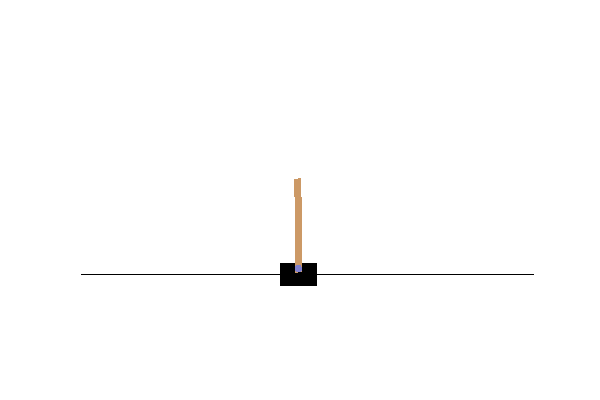
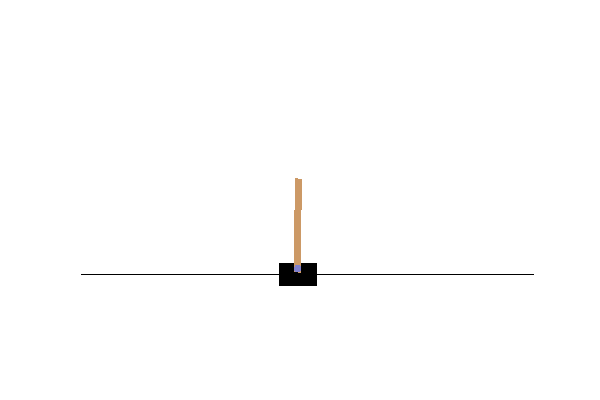
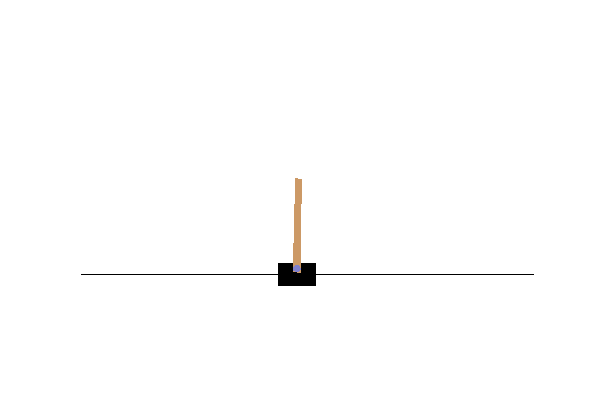
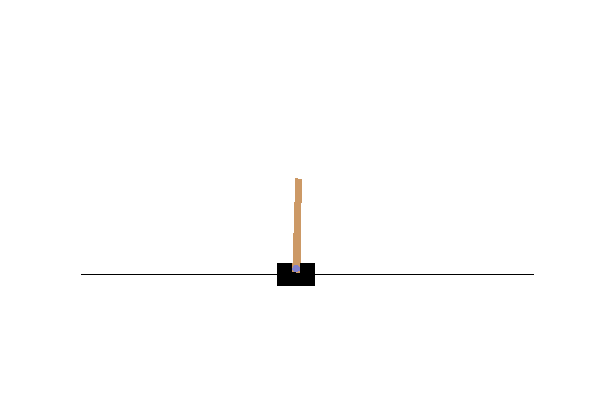
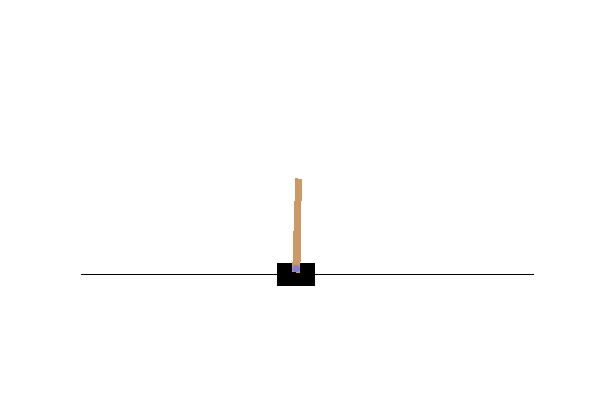
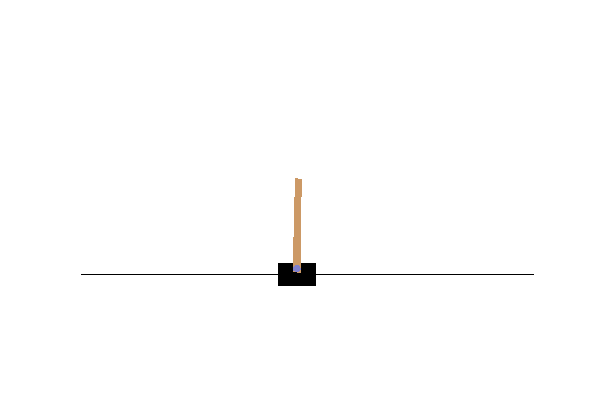
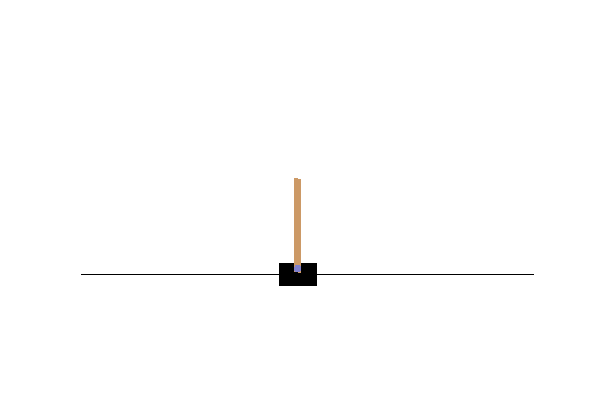
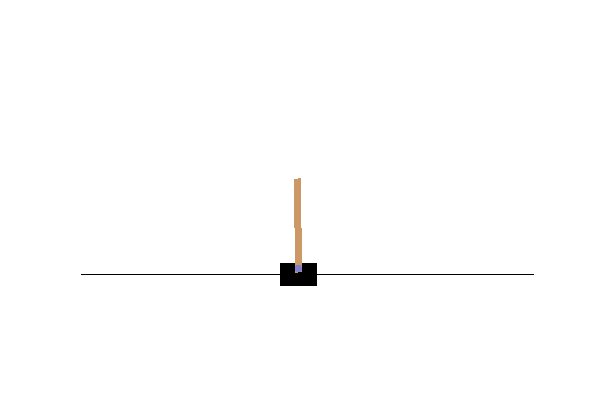
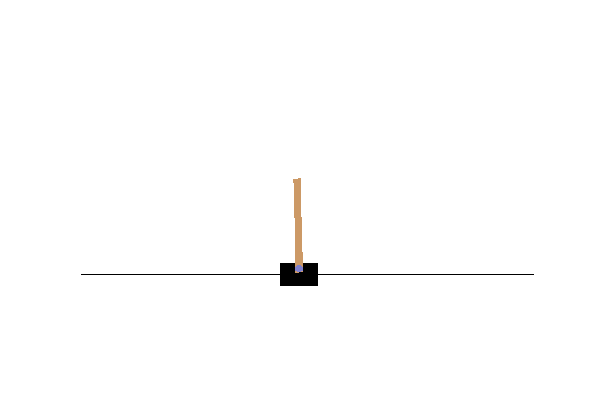
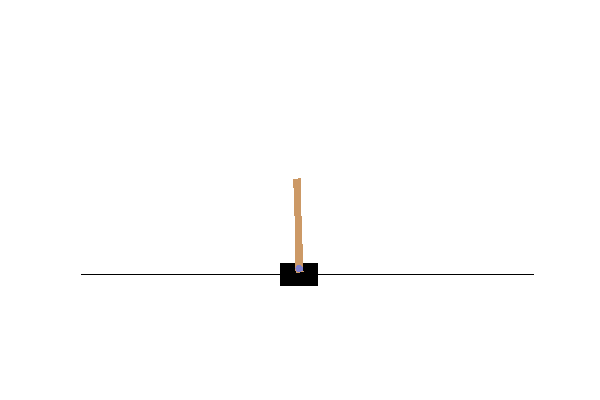
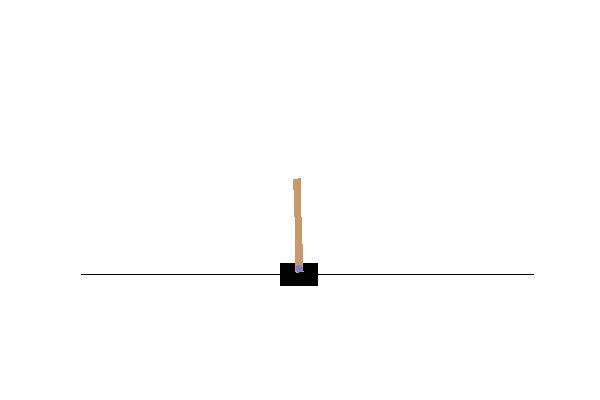
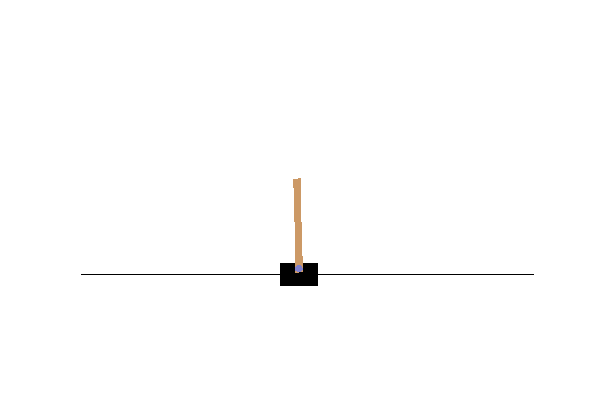
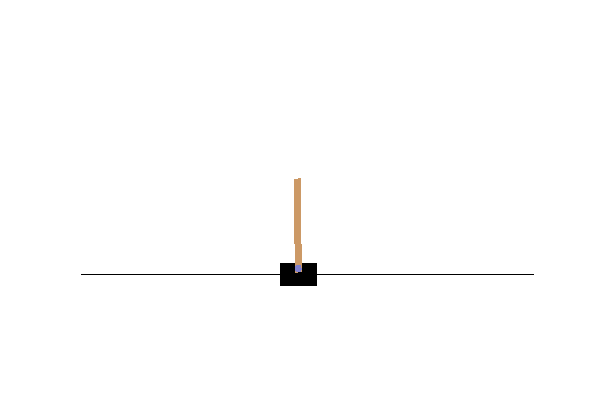
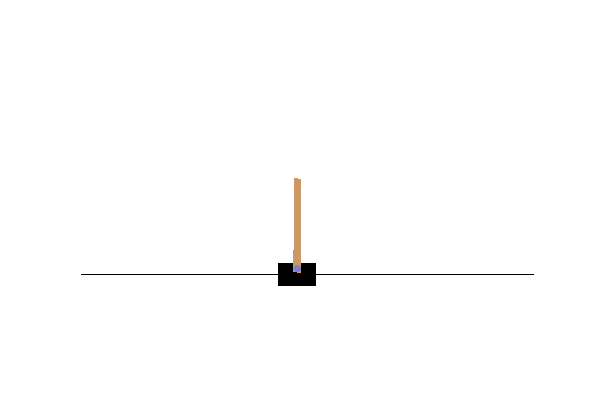
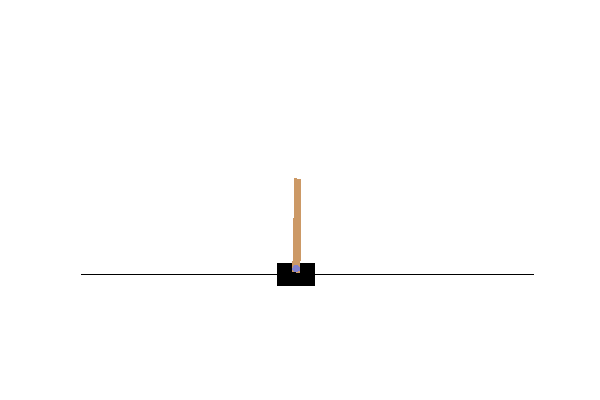
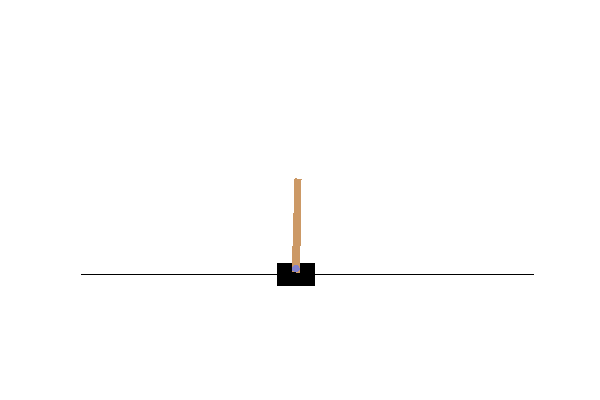
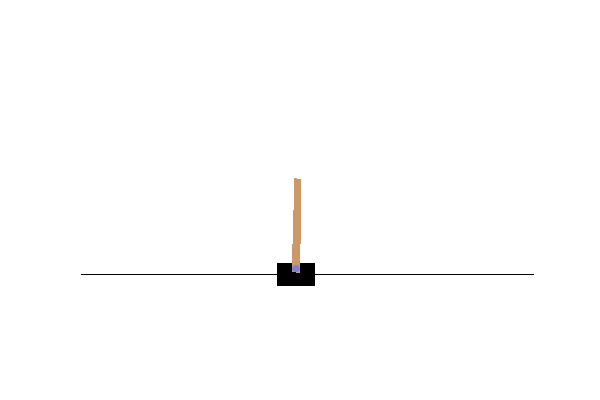
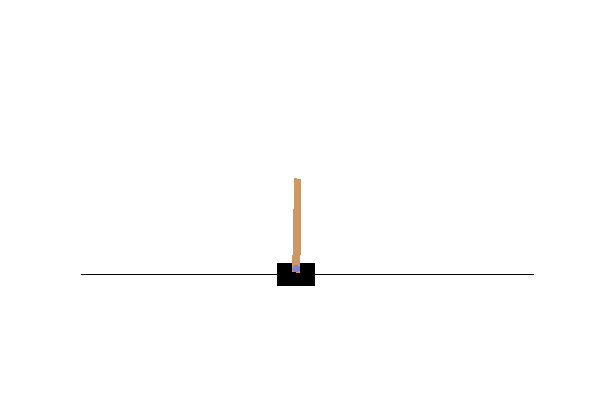
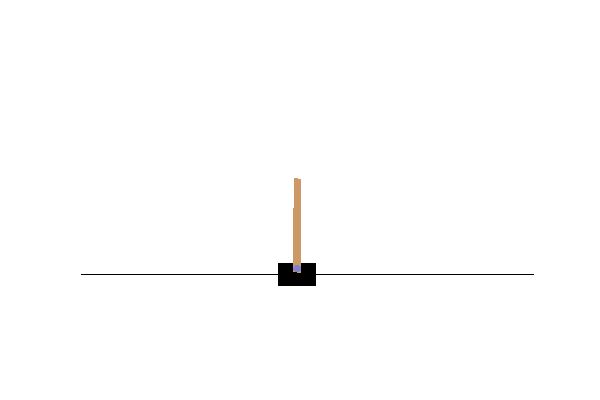
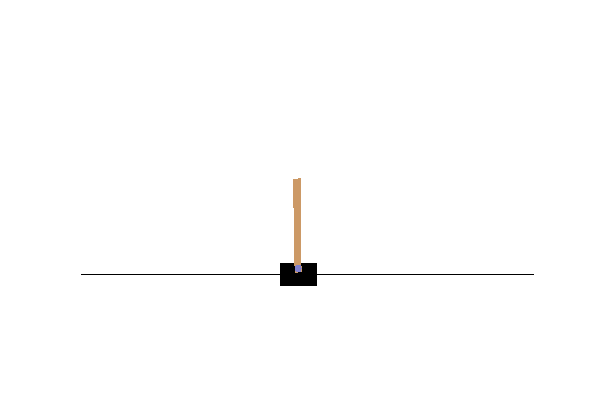
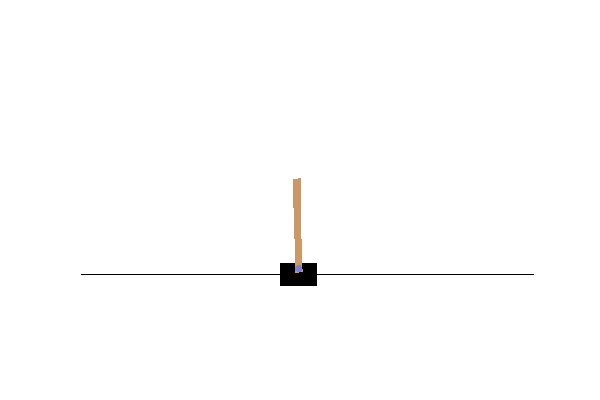
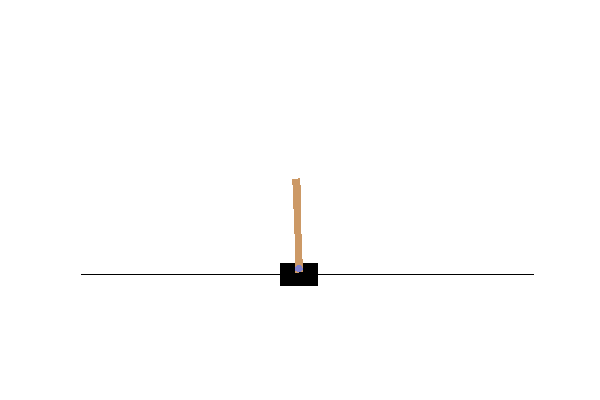
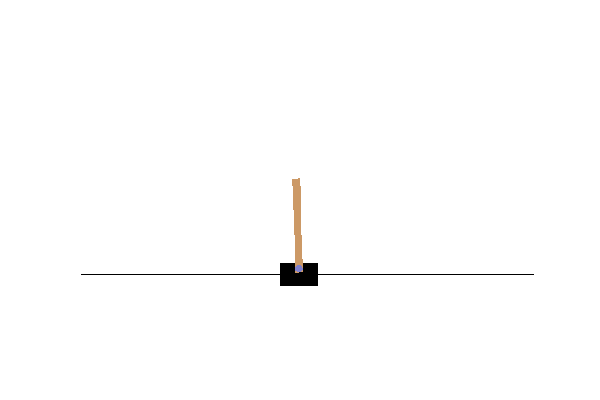
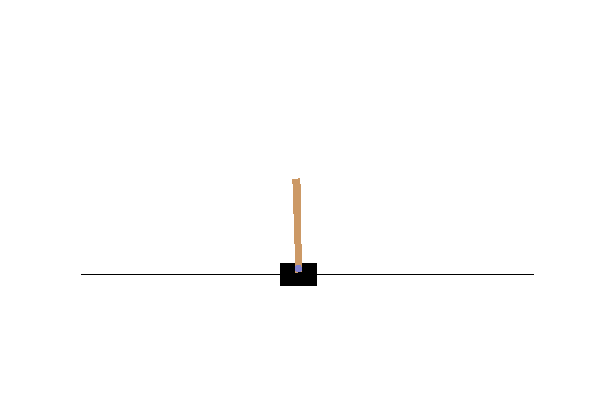
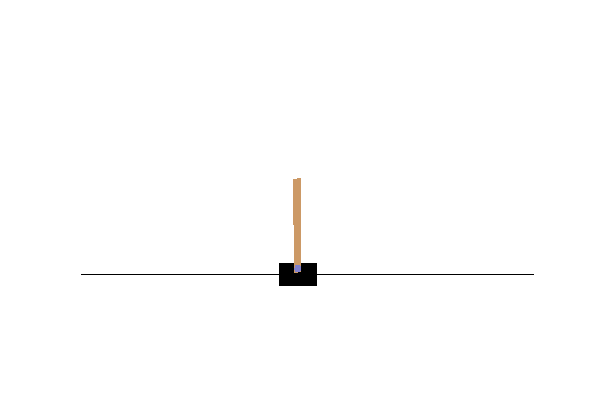
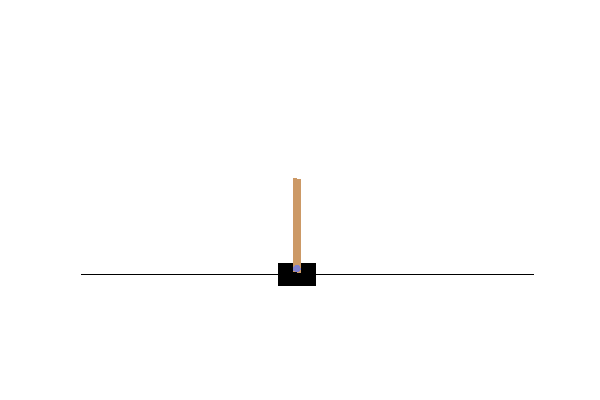
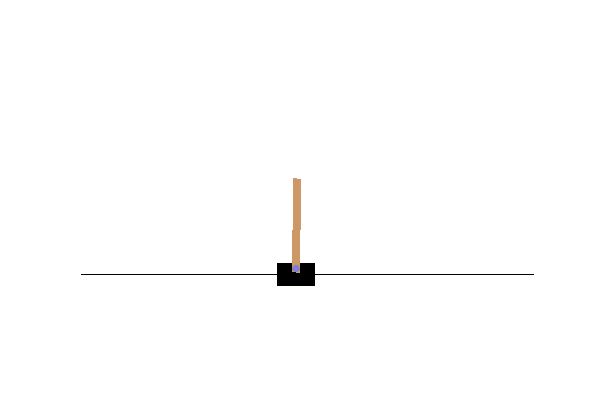
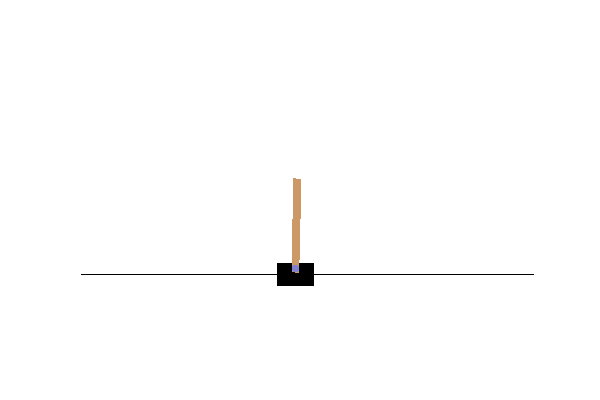
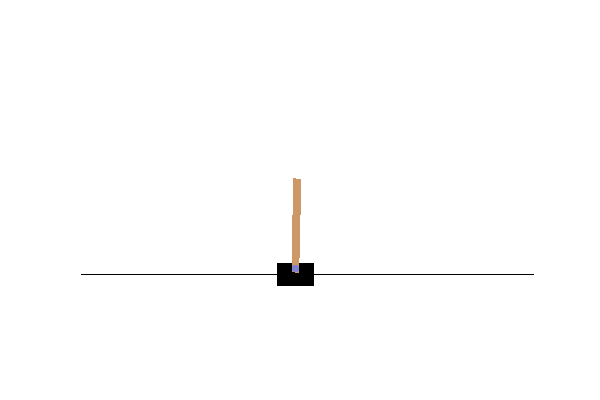
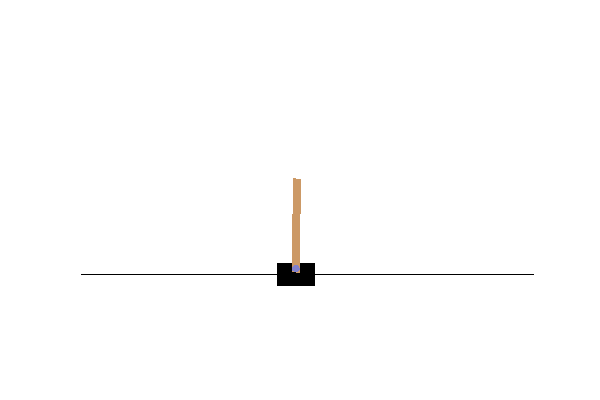
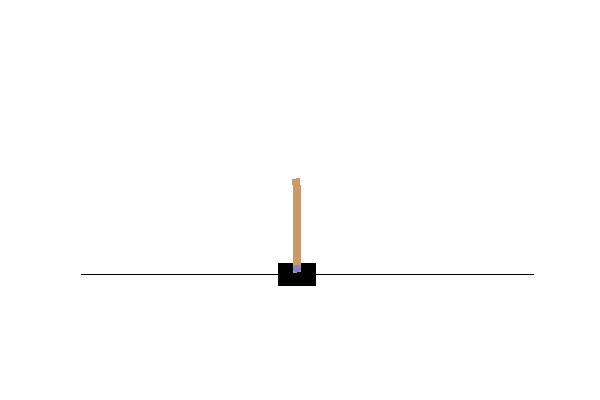
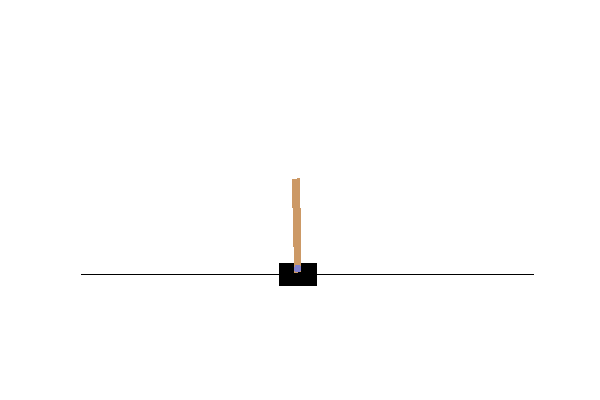
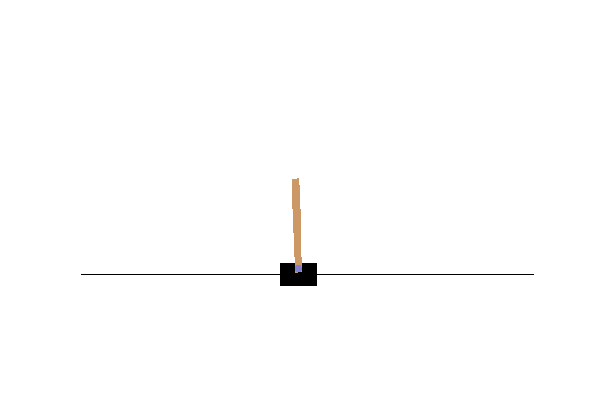
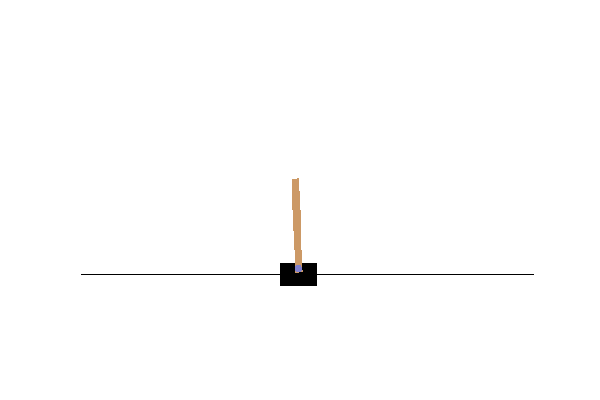
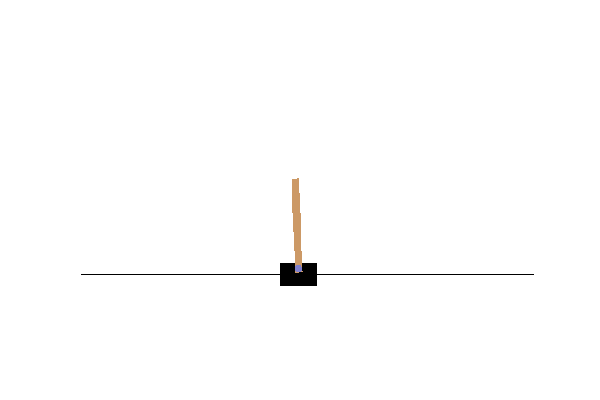
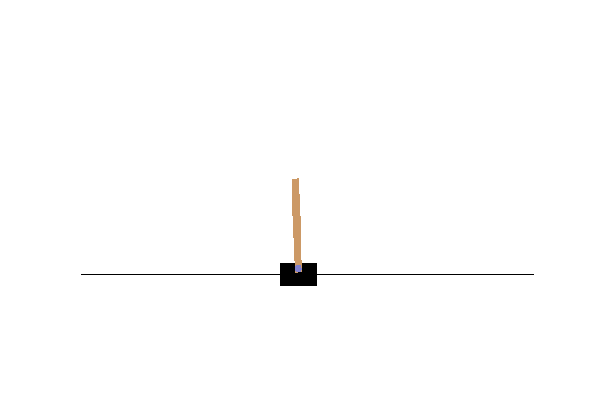
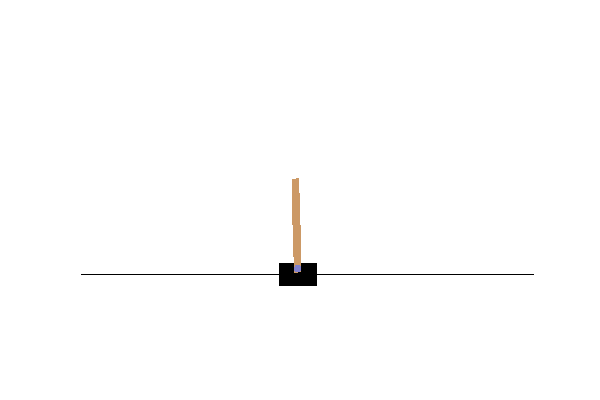
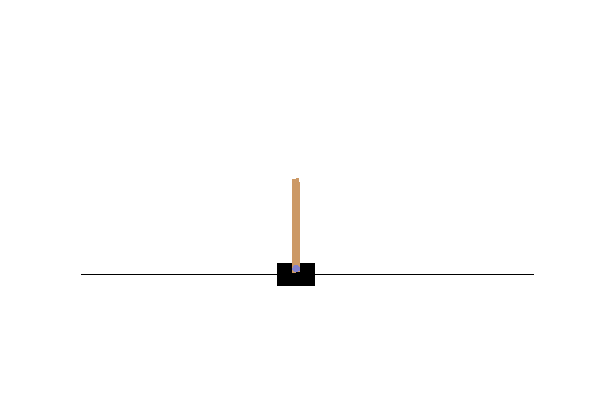
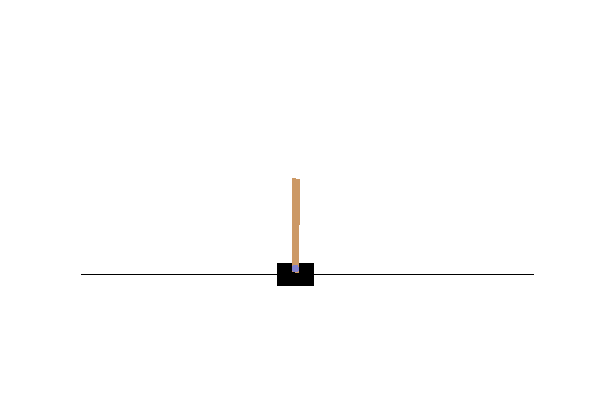
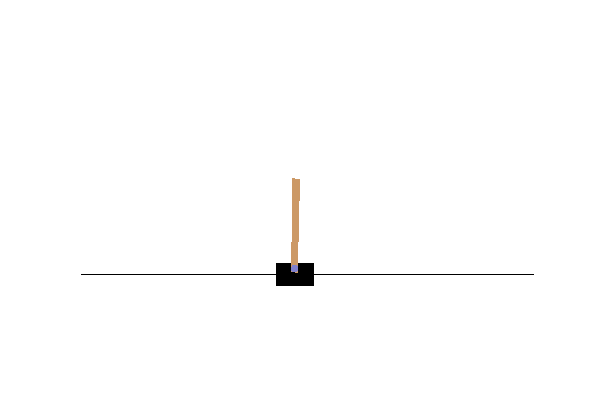
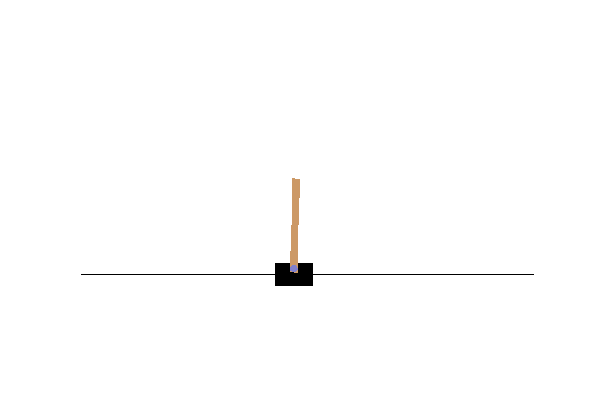
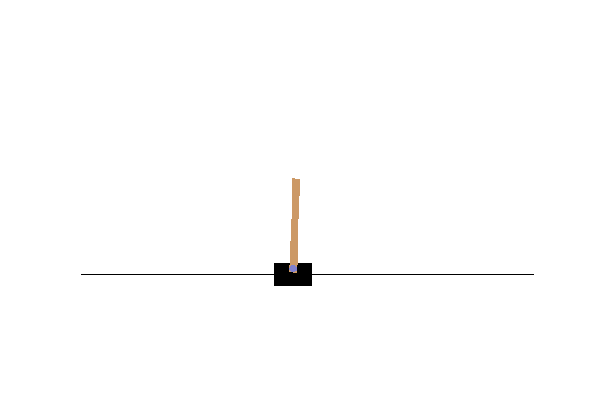
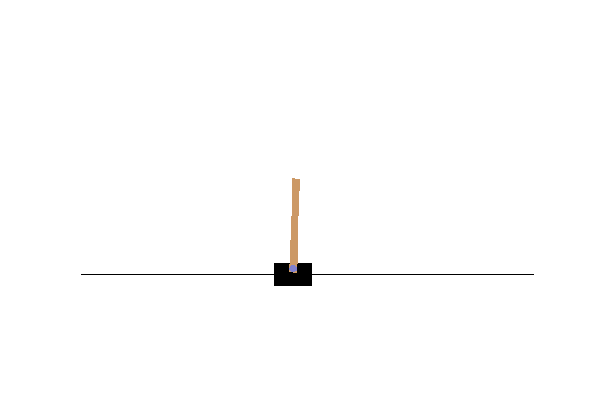
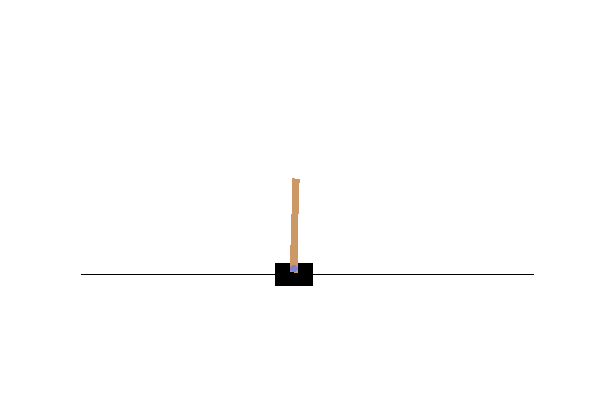
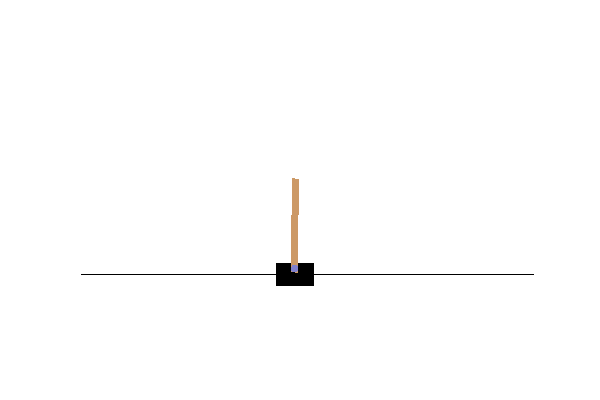
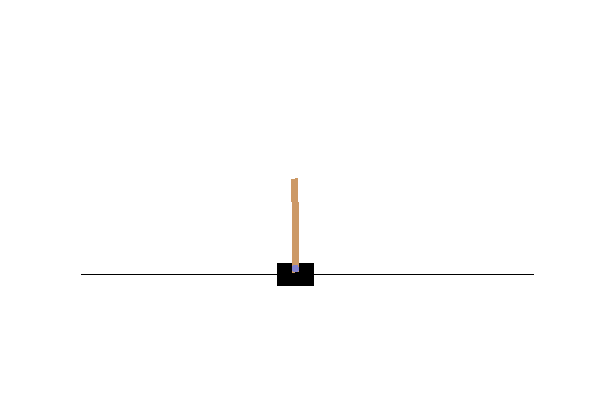
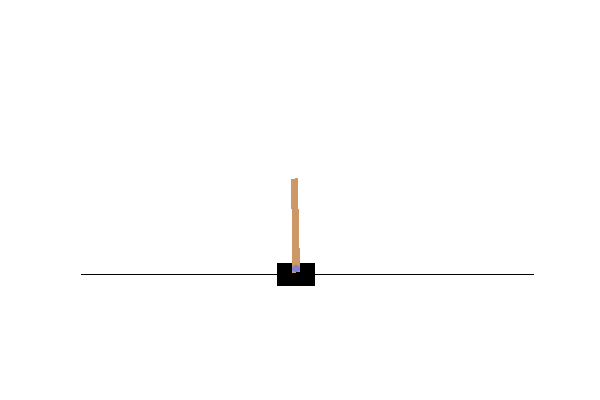
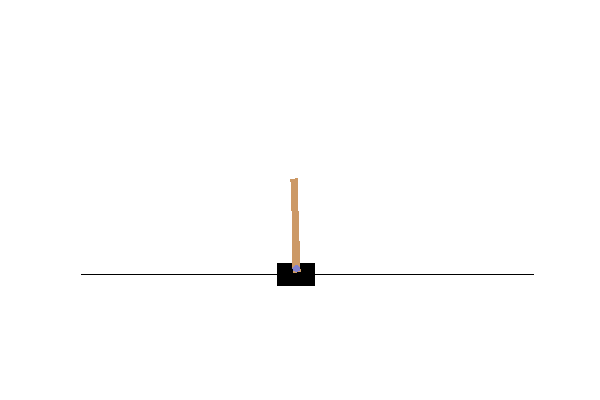
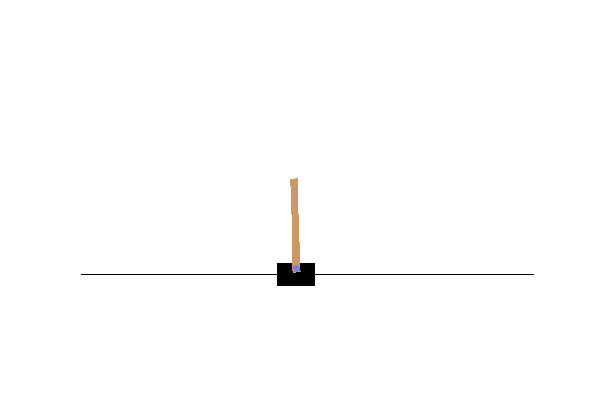
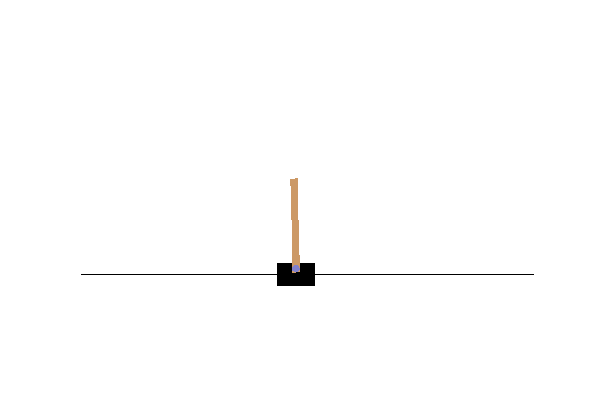
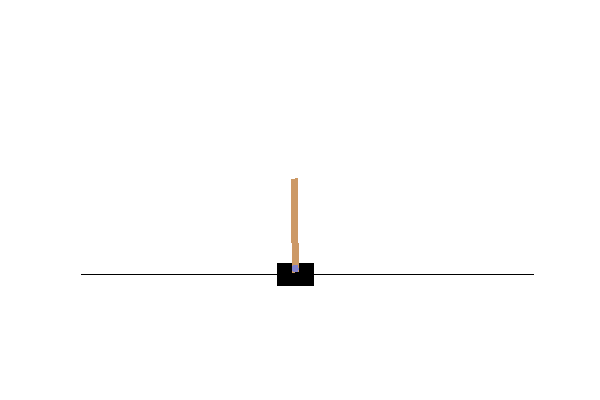
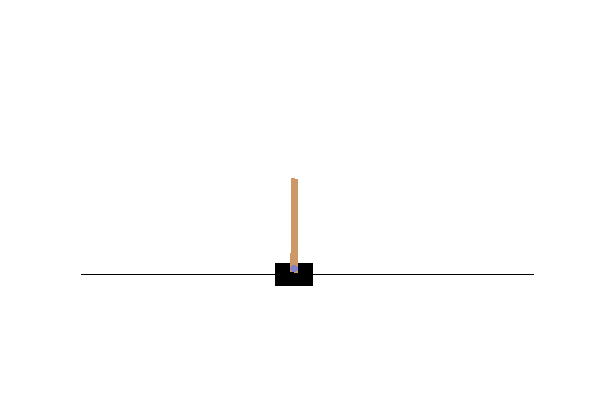
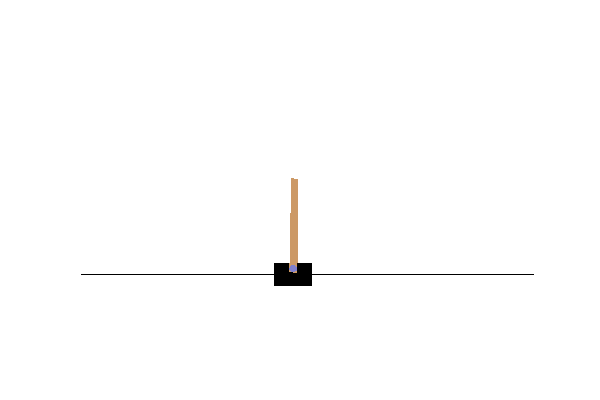
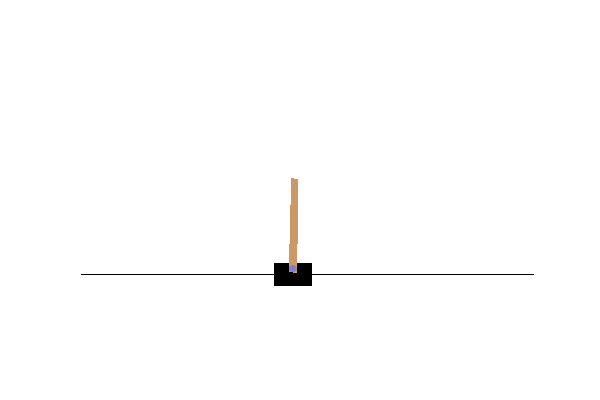
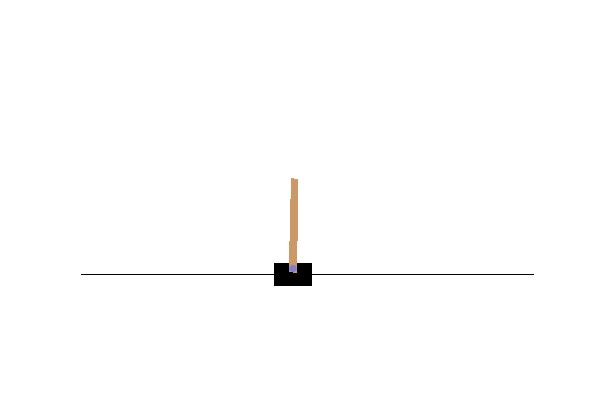
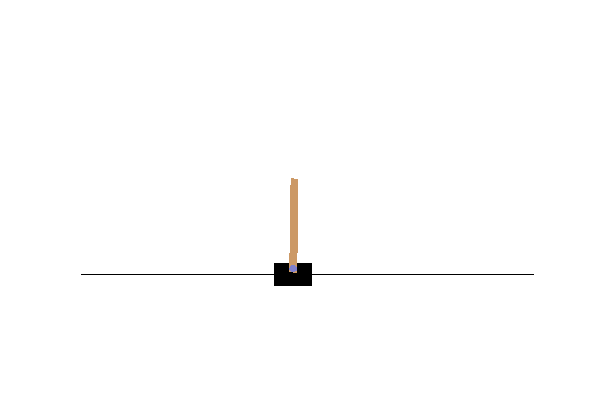
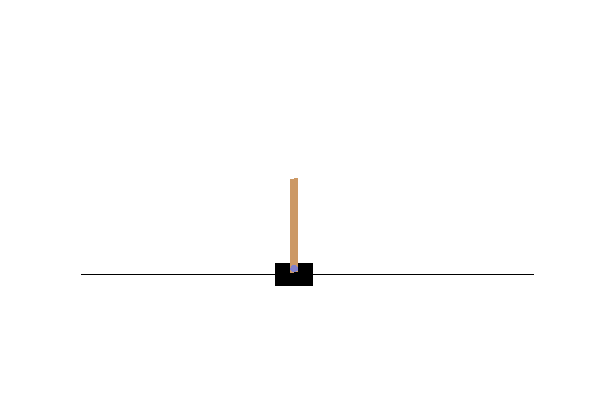
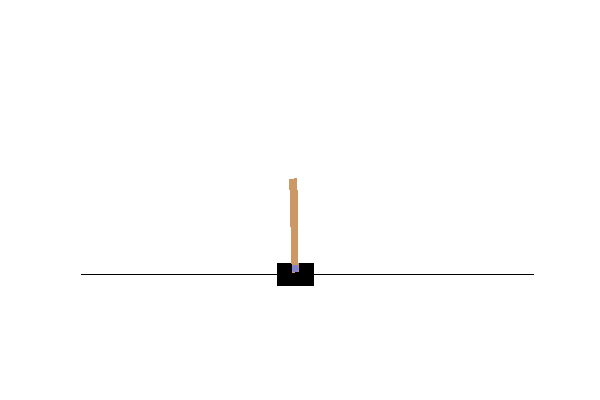
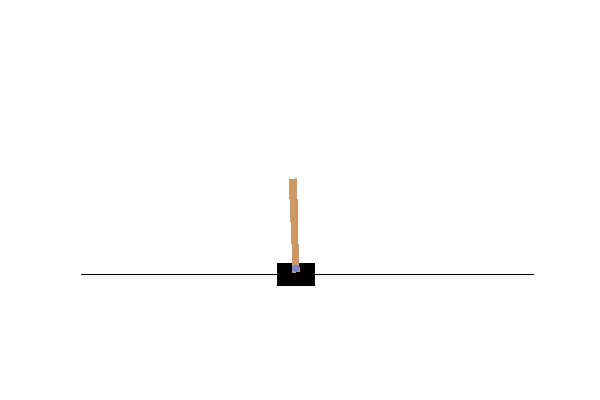
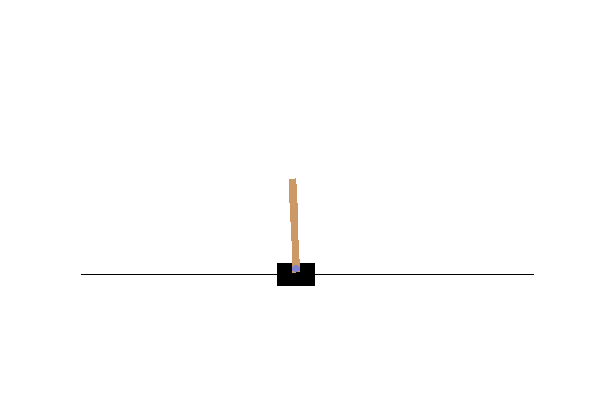
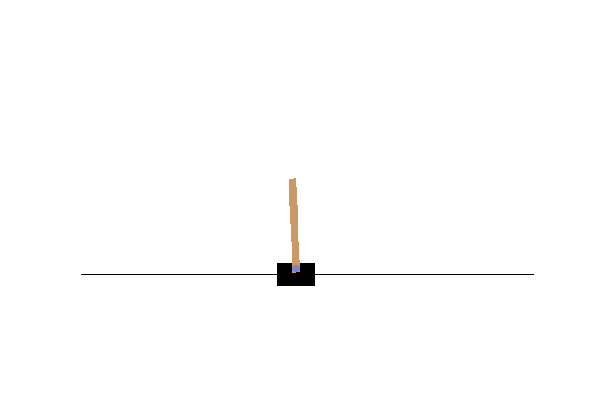
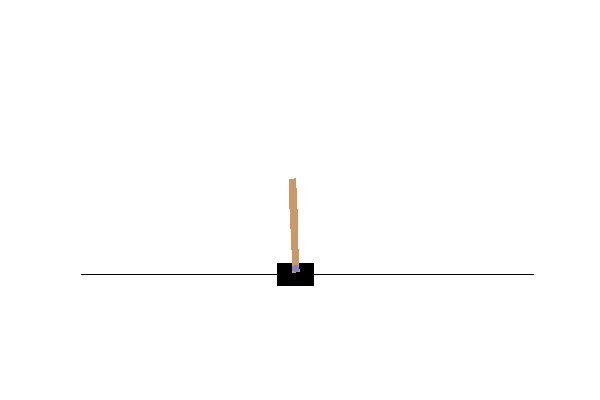
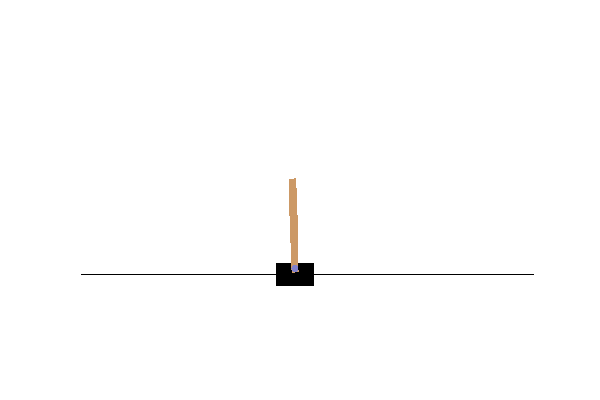
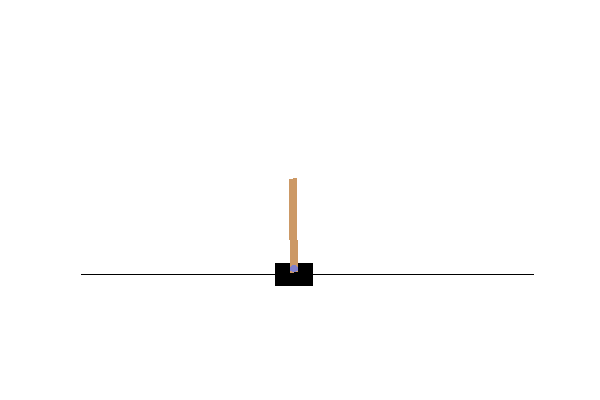
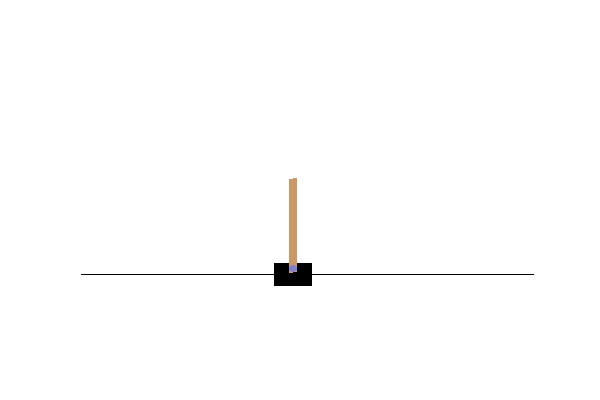
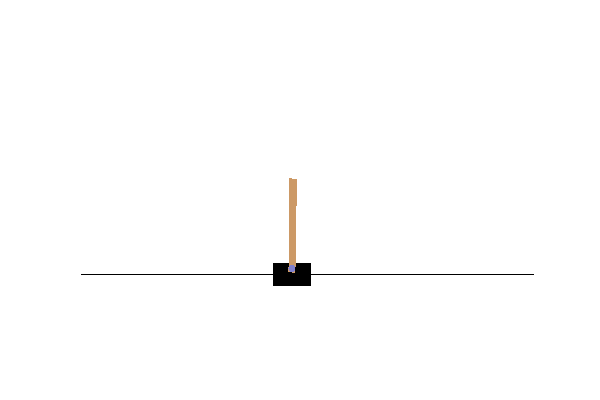
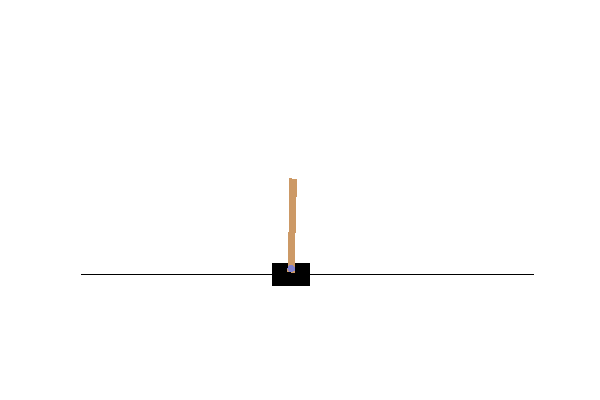
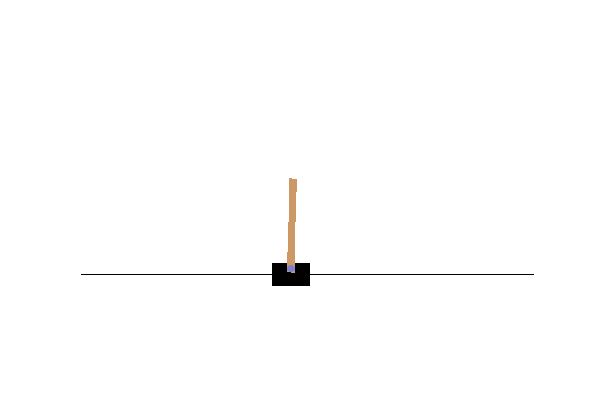
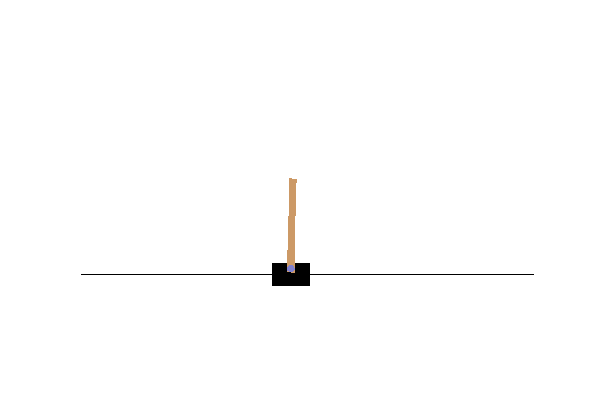
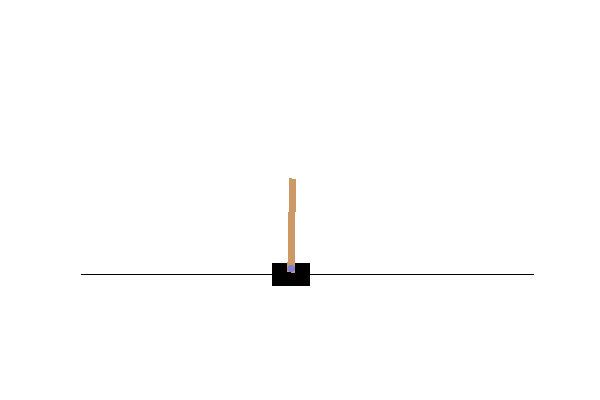
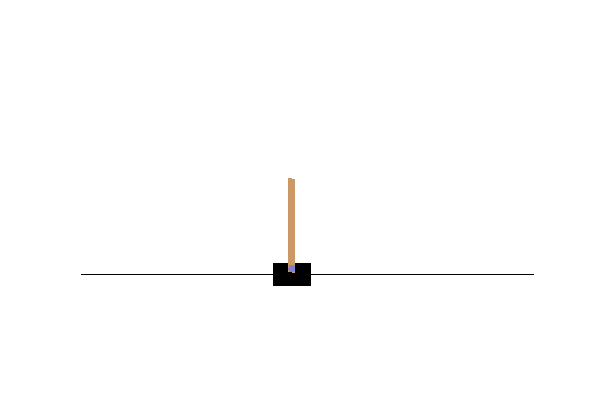
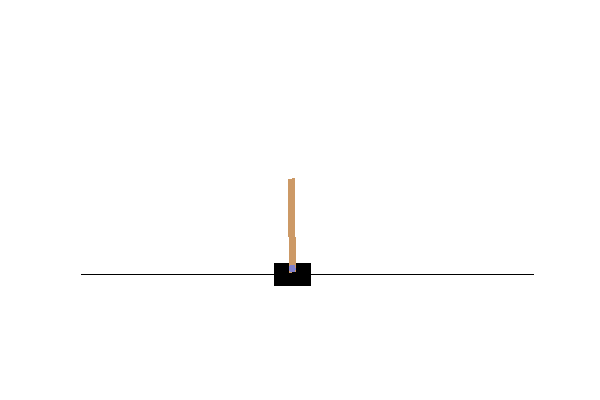
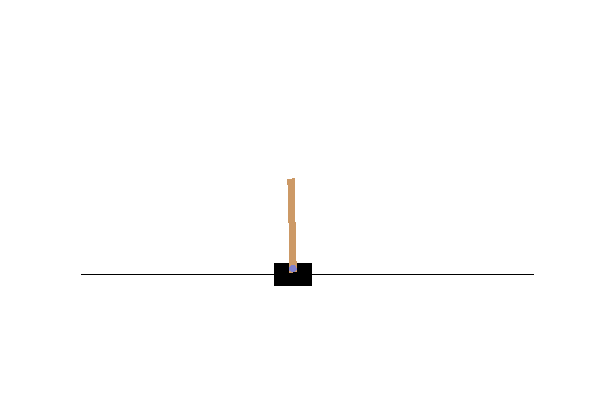
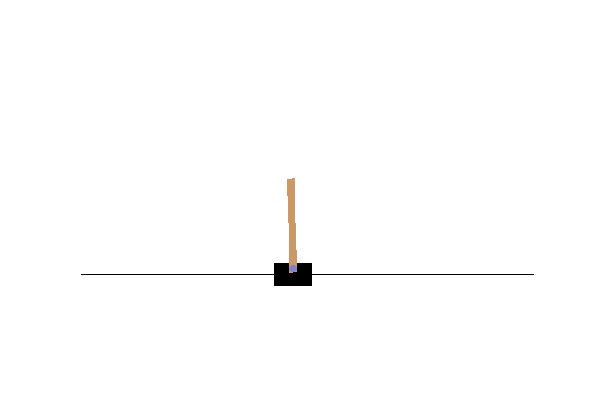
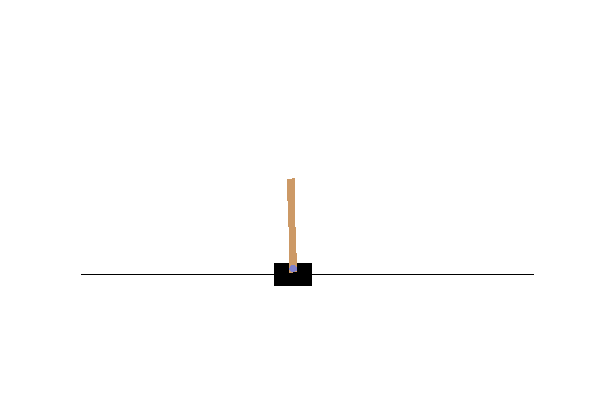
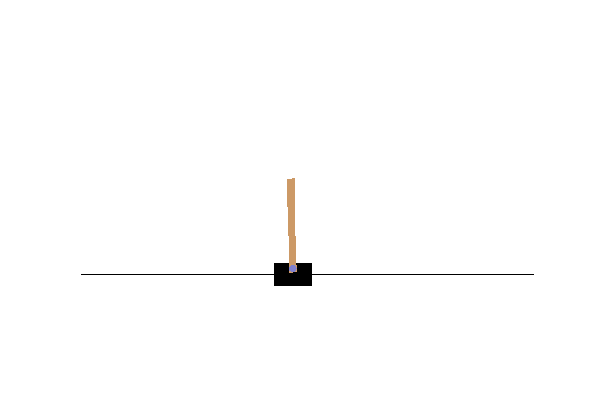
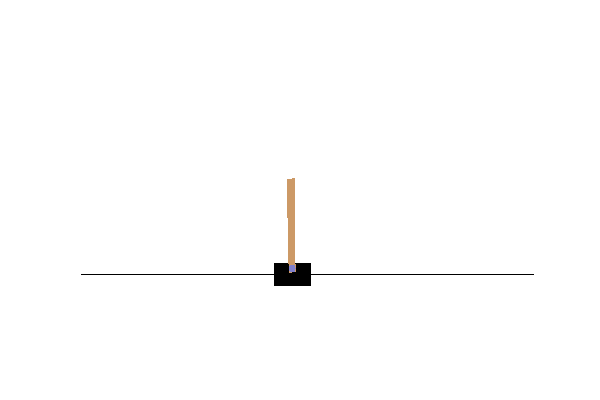
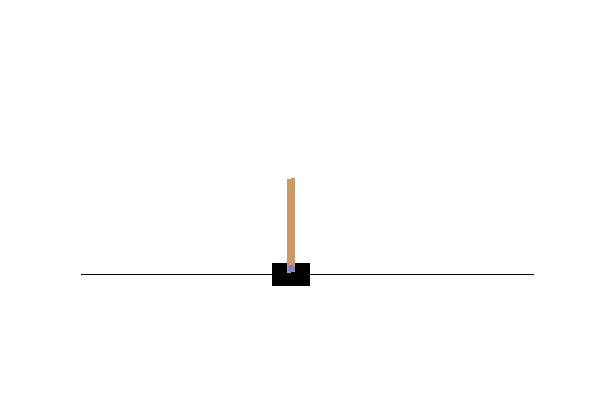
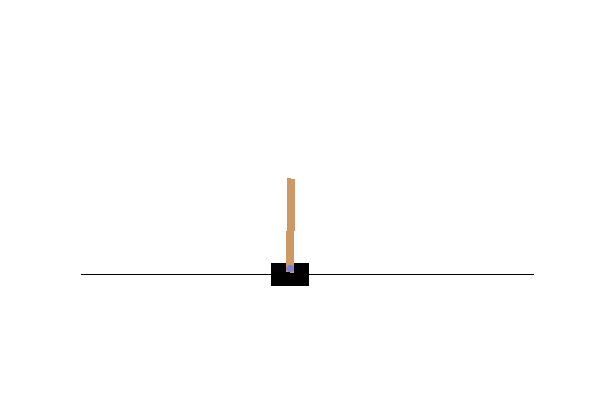
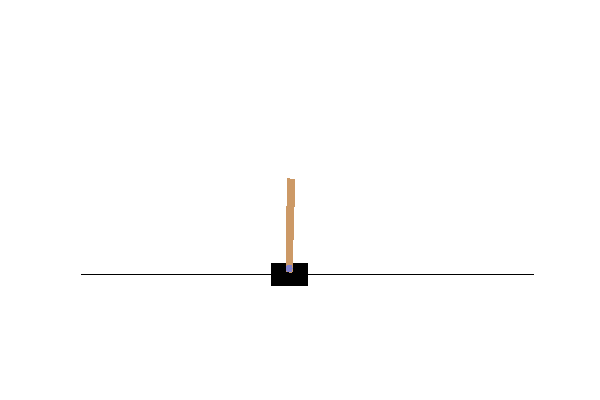
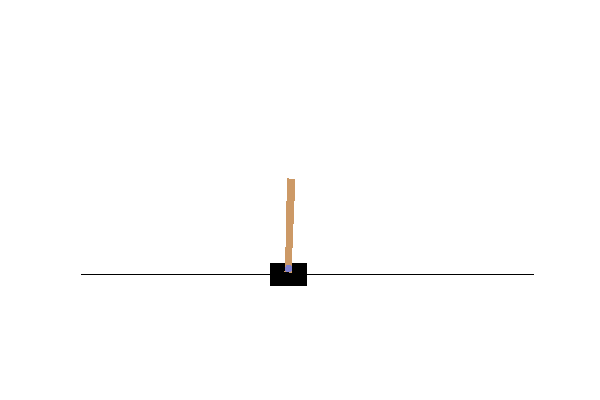
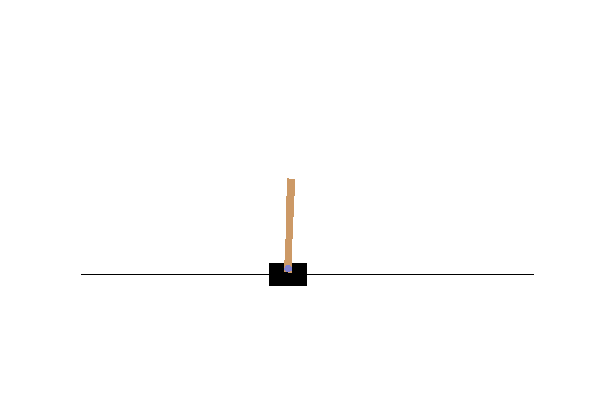
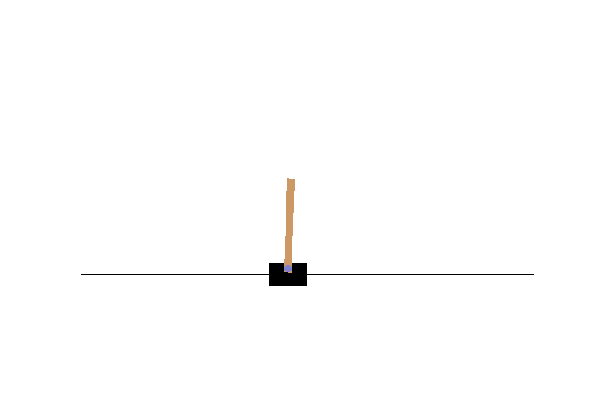
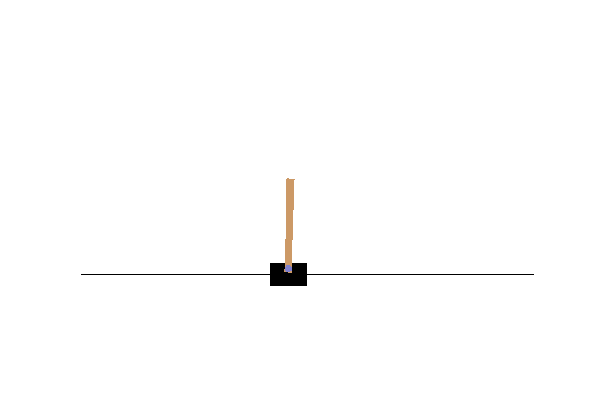
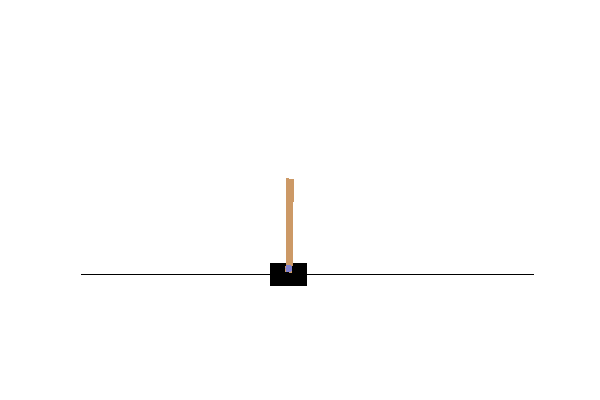
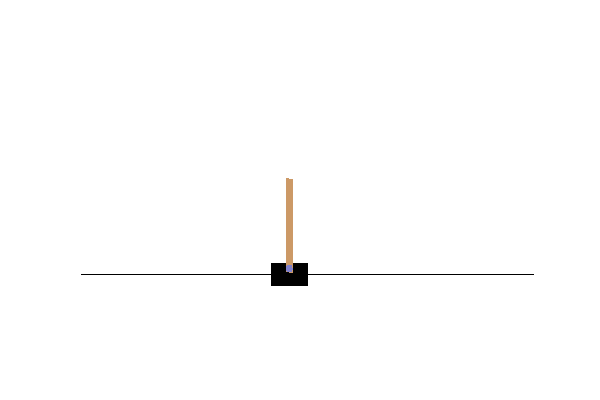
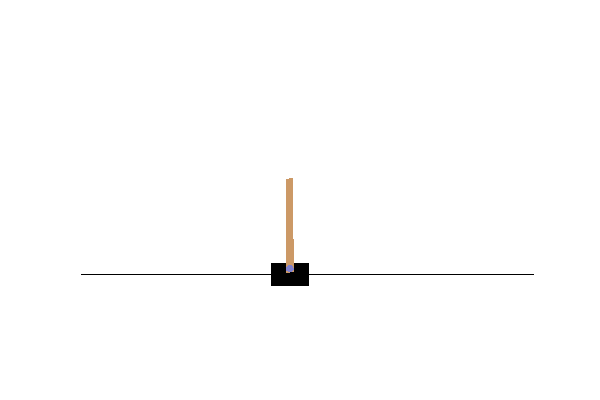
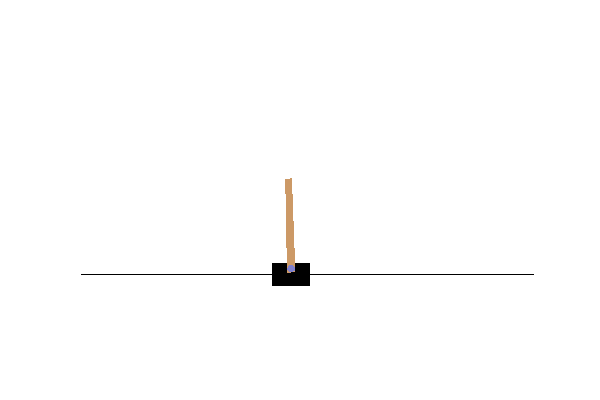
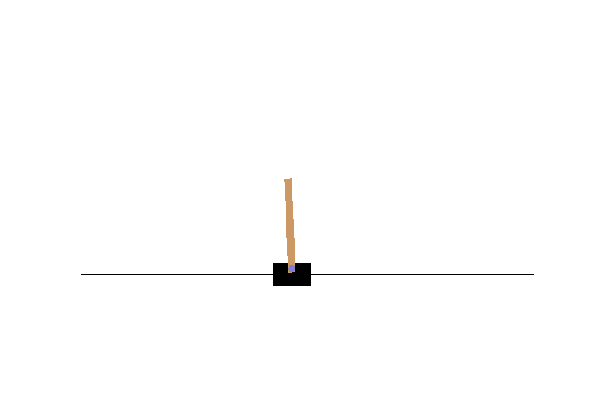
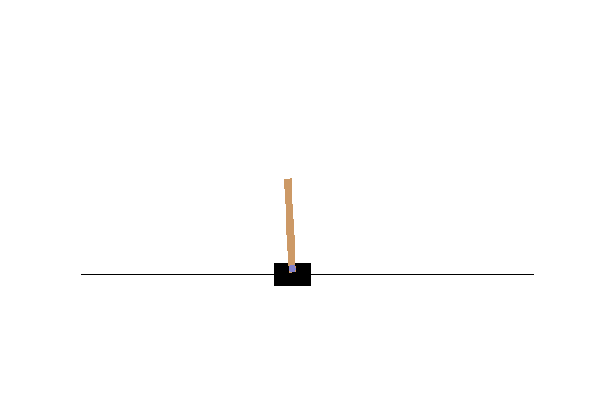
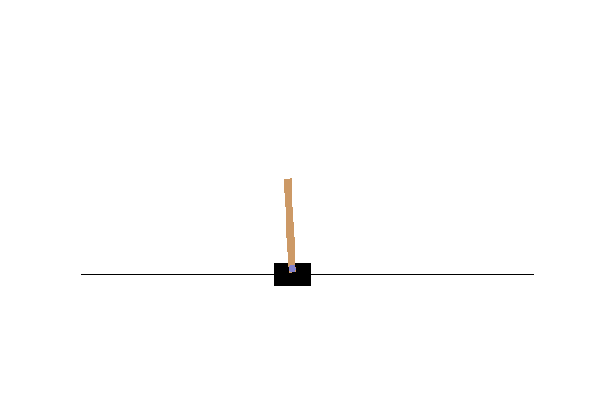
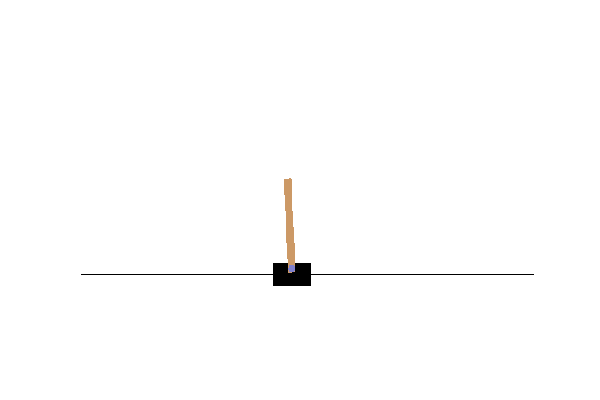
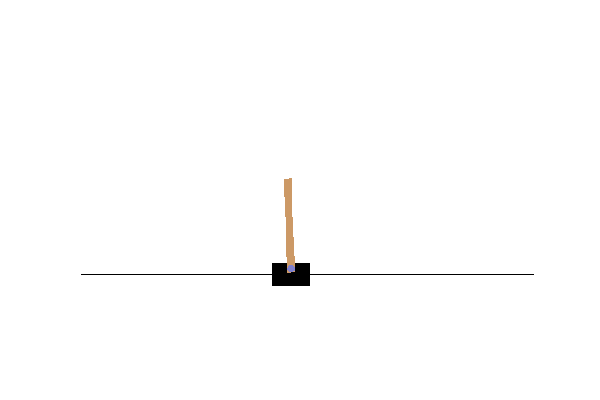
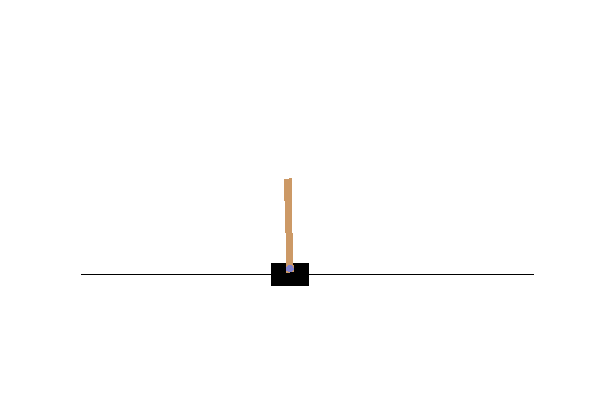
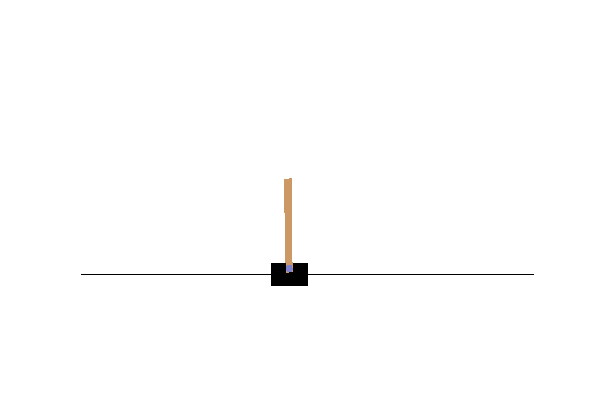
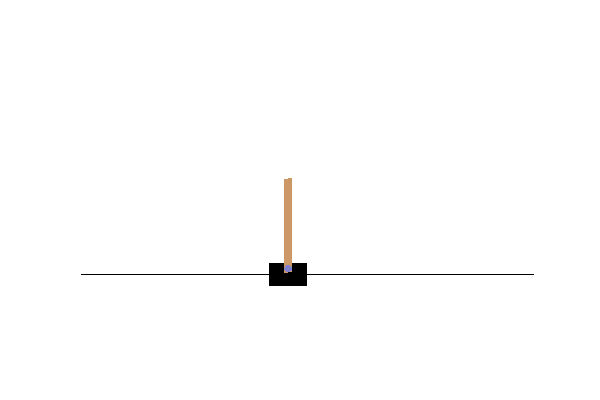
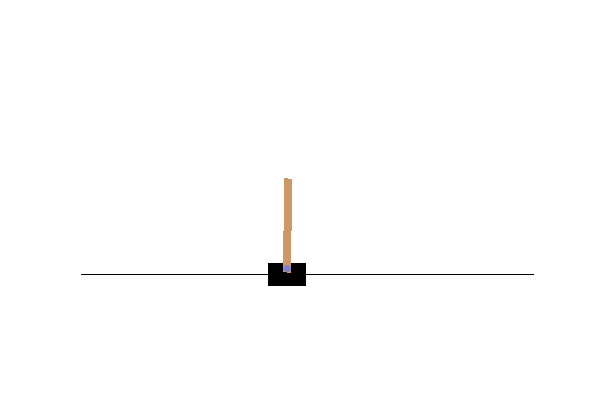
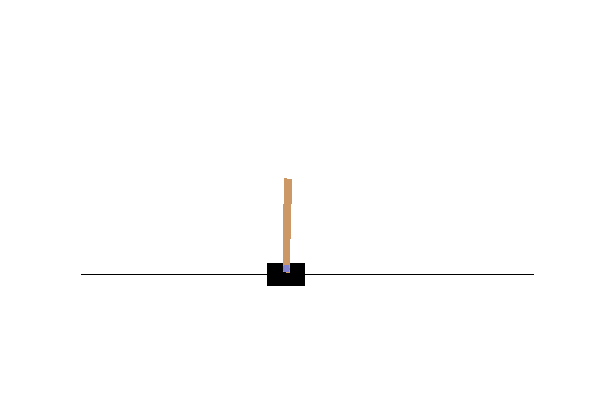
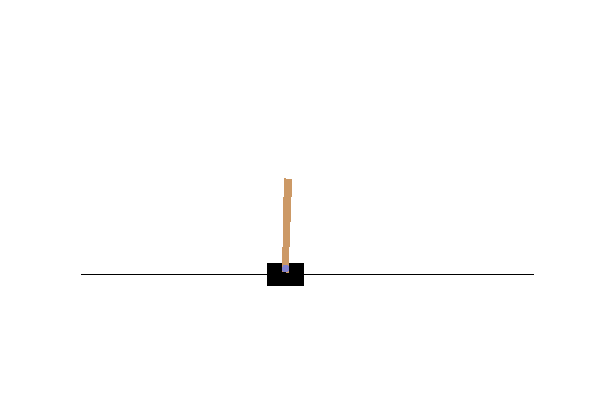
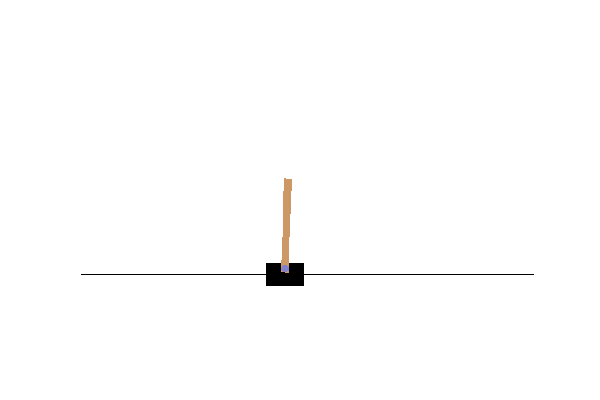
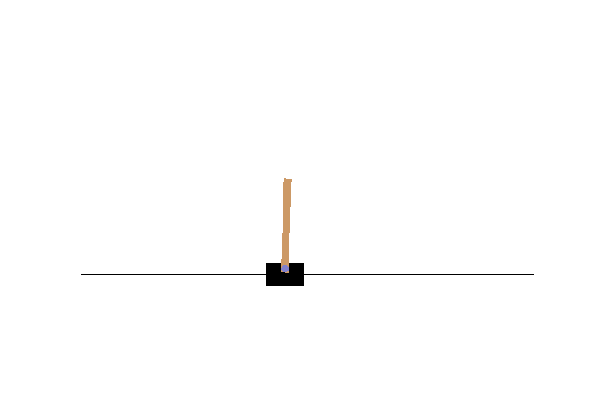
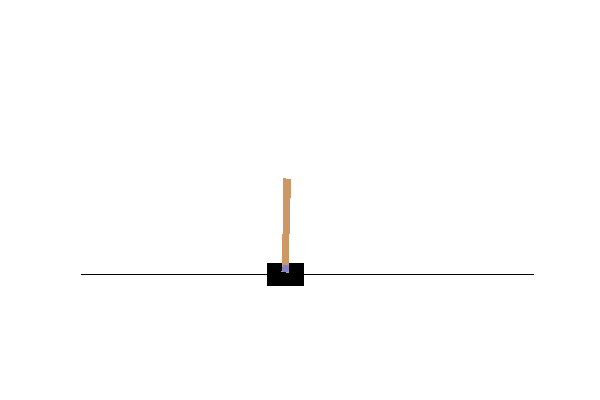
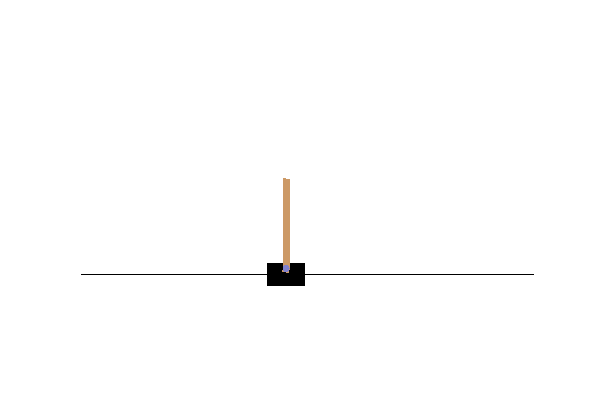
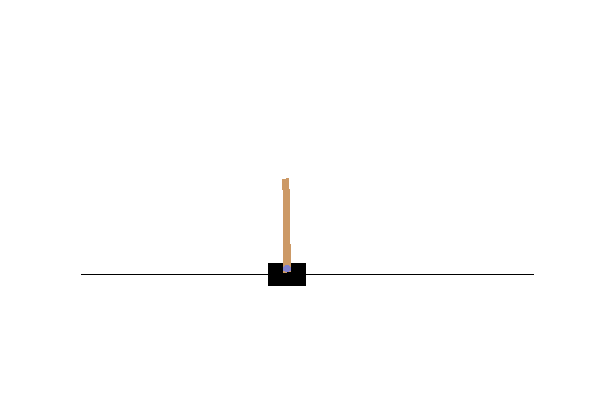
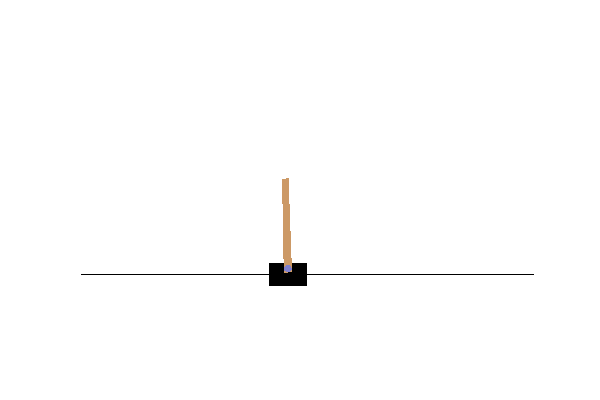
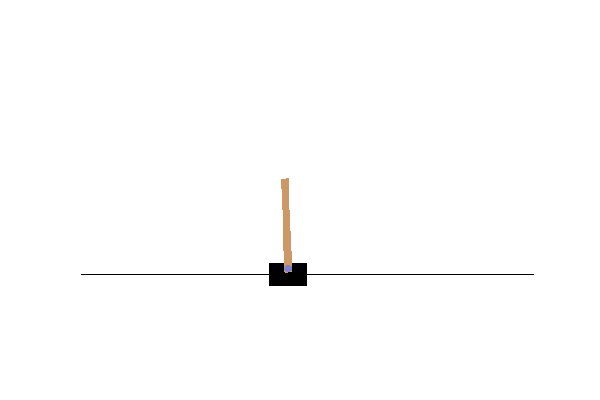
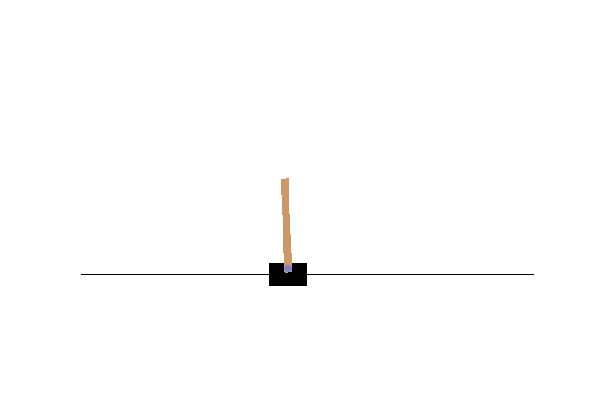
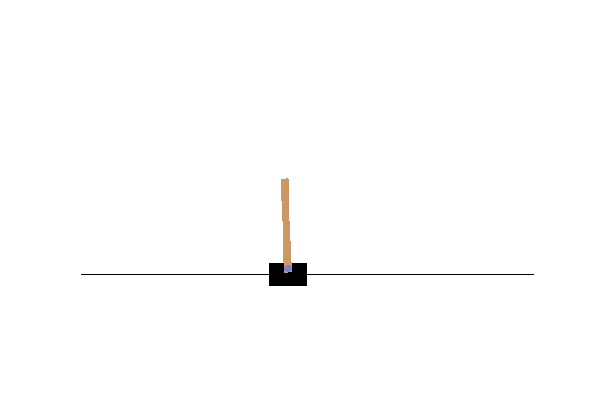
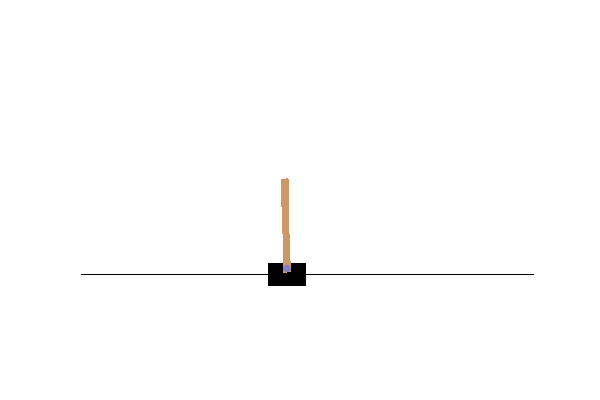
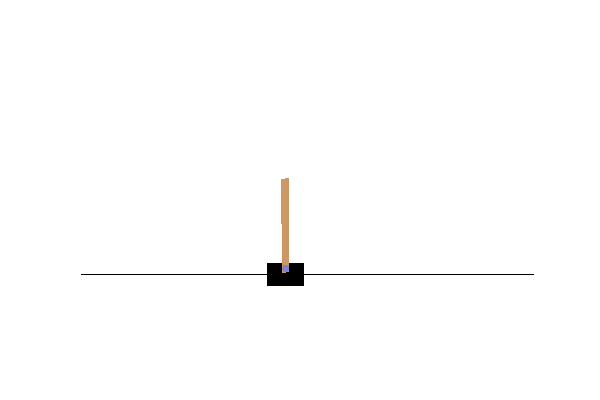
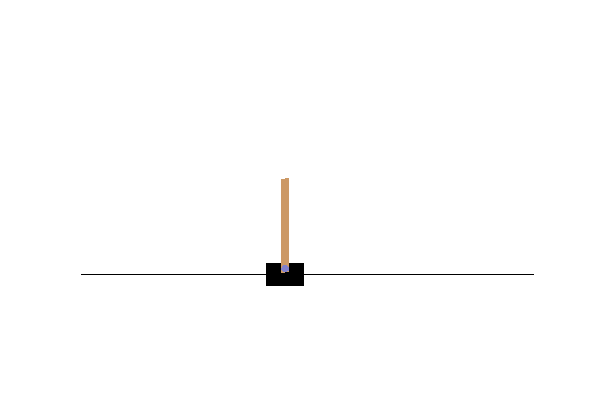
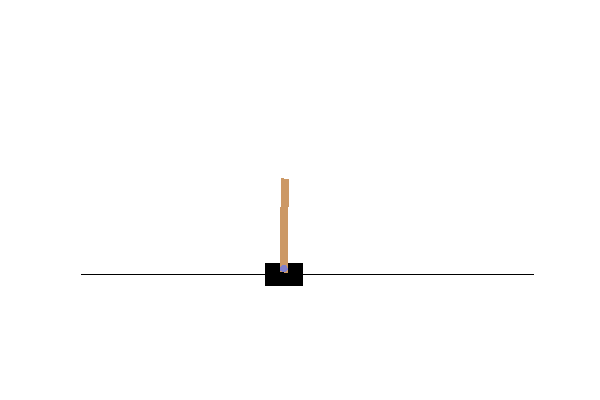
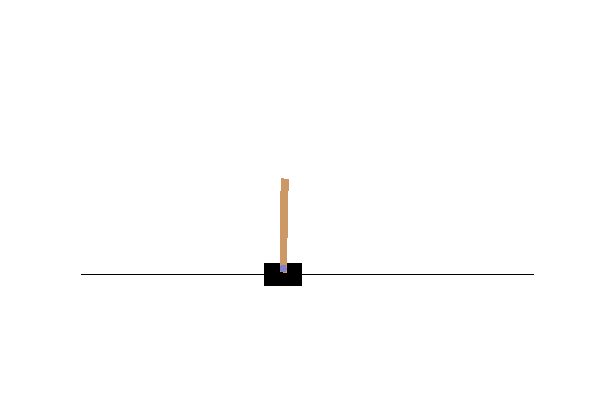
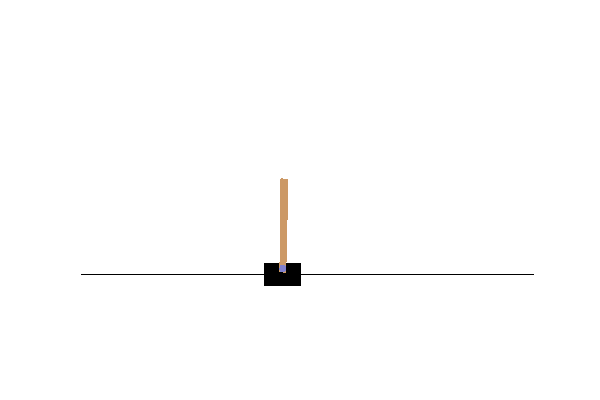
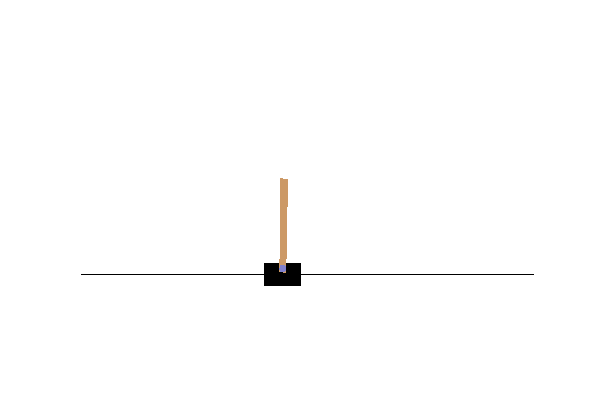
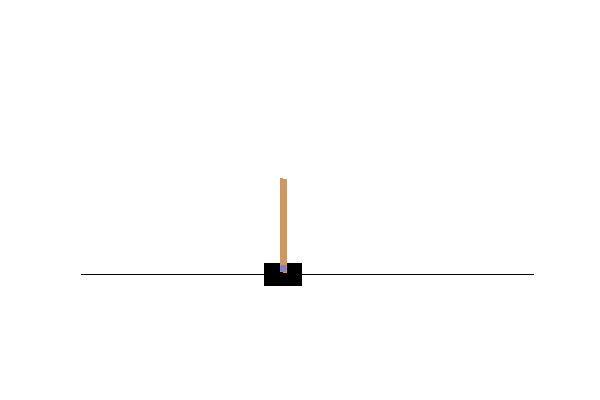
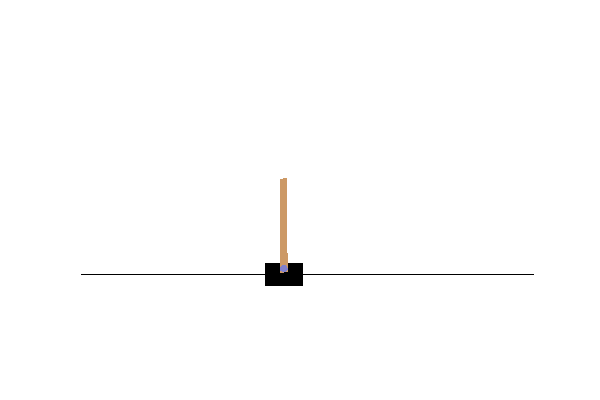
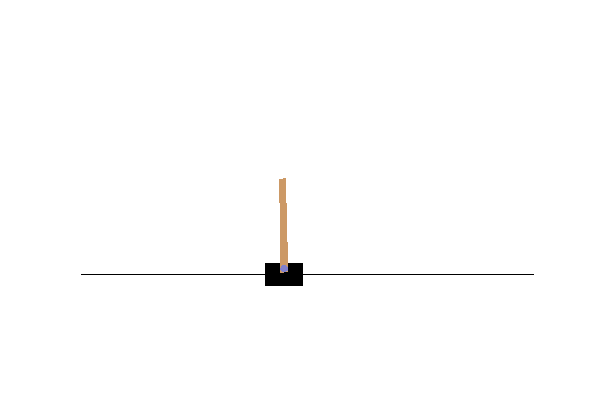
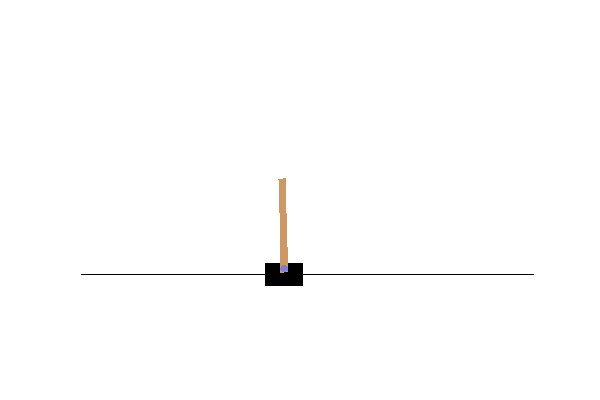
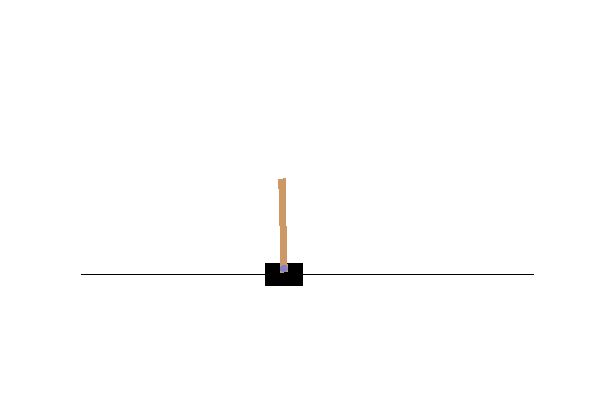
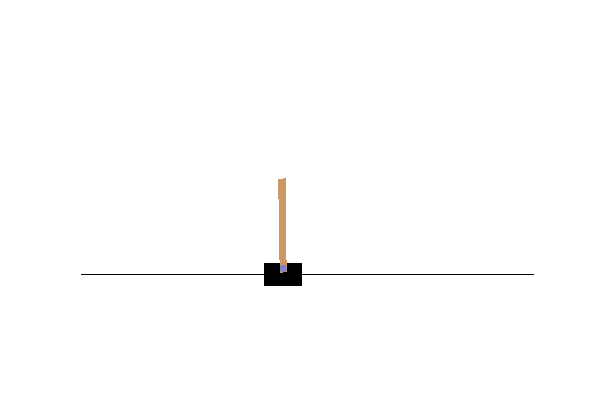
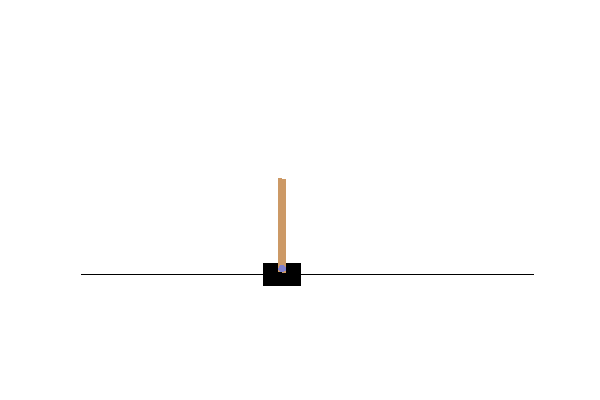
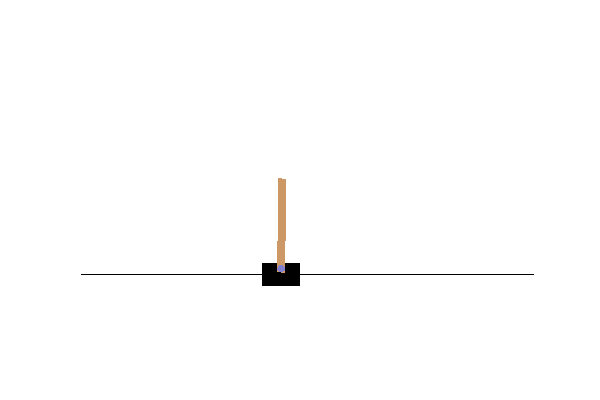
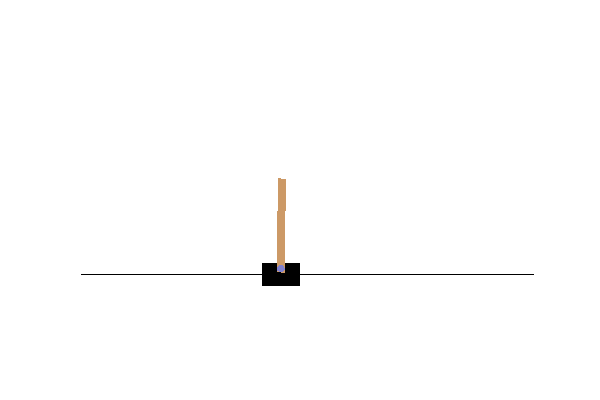
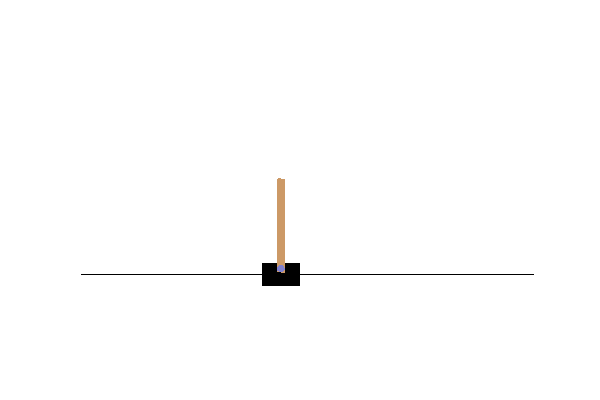
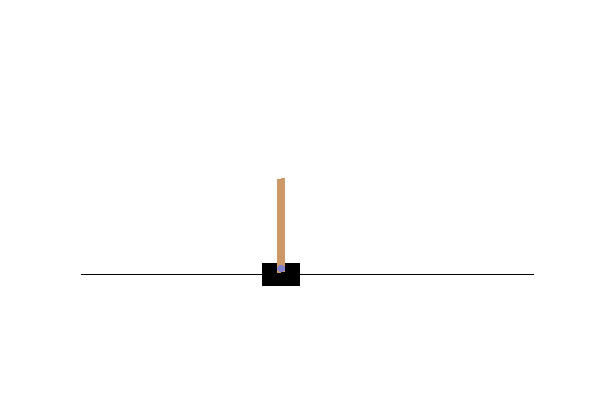
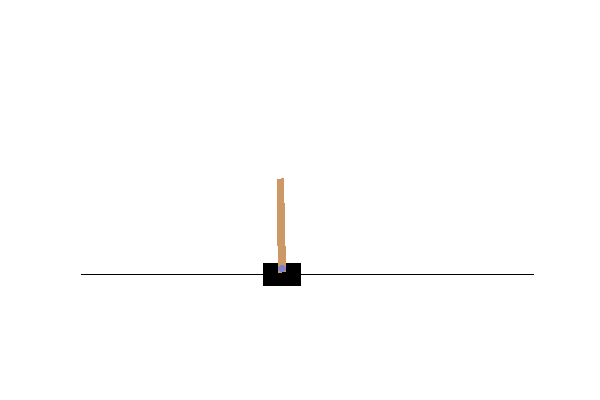
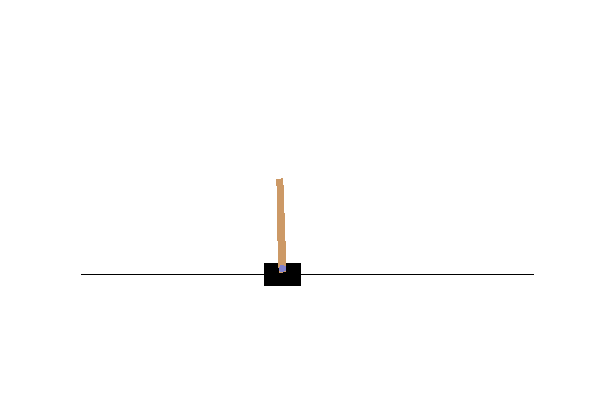
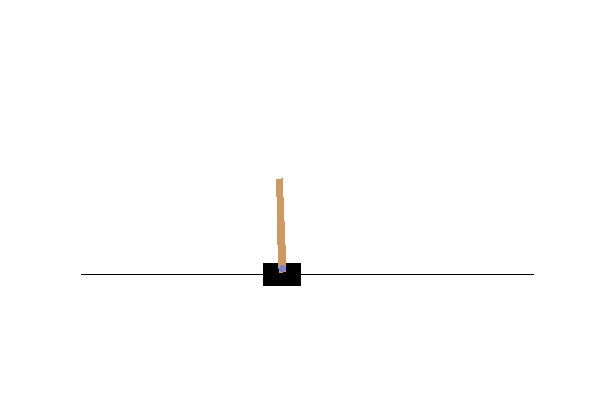
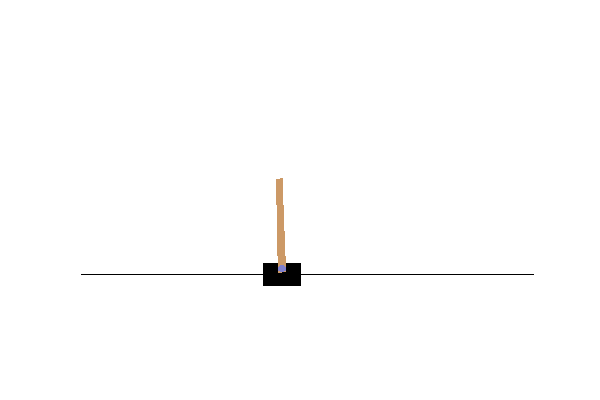
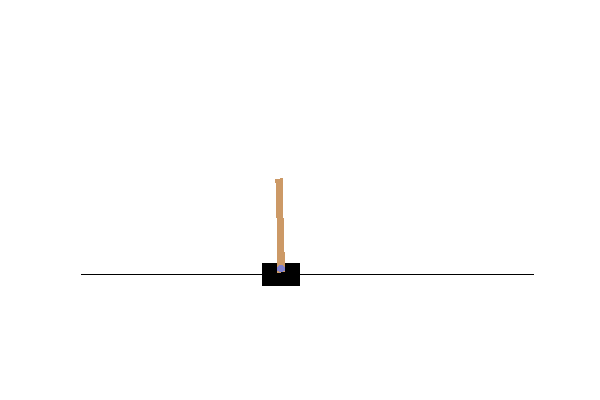
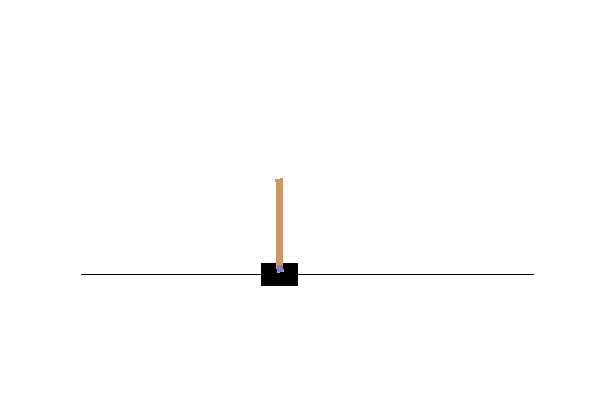
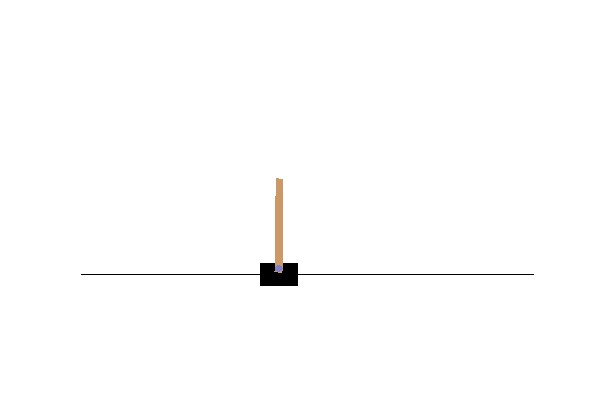
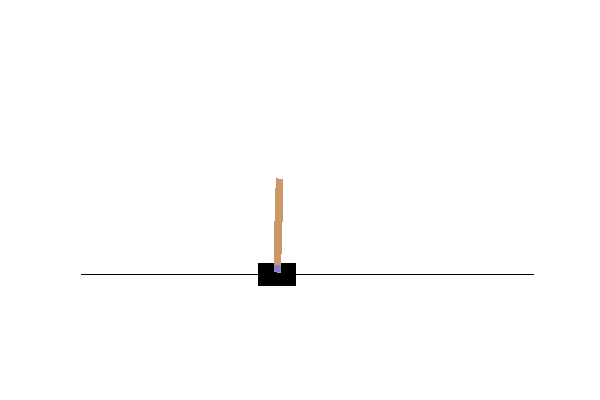
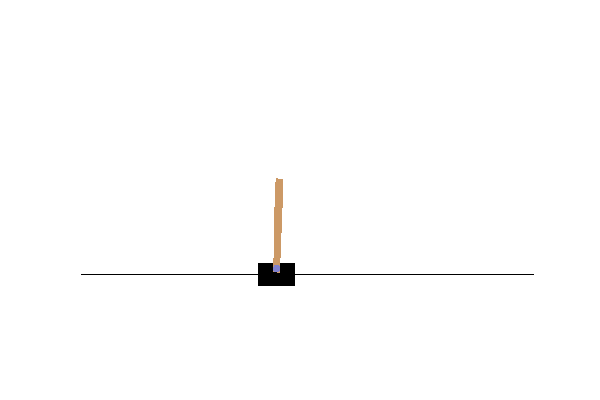

In [9]:
cartpole_env = Environment()
cartpole_env.run()